In [1]:
import numpy as np
import os
import math

import matplotlib.pyplot as plt

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize


import optimalrcs,metrics,plots

2025-07-31 20:17:27.274844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-31 20:17:27.285072: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-31 20:17:27.288273: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-31 20:17:27.295745: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="The raw code for this Python notebook is by default hidden for easier reading. Click here to toggle on/off the raw code."></form>''')

In [3]:
f=open('2f4kpnas380.CArmsd')
rmsd=[]
for l in f:
    l=l.split()
    rmsd.append(float(l[1]))
f.close()
rmsd=np.asarray(rmsd,np.float32)

def read_dih(name):
    import numpy as np
    from scipy.io import FortranFile
    f=FortranFile(name,'r')
    rec=f.read_record(np.dtype('i4'))
    nsets=rec[0]
    ndih=rec[1]
    csdih=np.zeros((nsets,ndih),dtype='f4')
    csdih=f.read_record(np.dtype('f4')).reshape((ndih,nsets))
    csdih=np.transpose(csdih)
    return csdih
    
    
csdih=read_dih('csdih')
nsets,ndih=csdih.shape
print(csdih.shape,rmsd.shape)

(1509392, 136) (1509392,)


2025-07-31 20:17:29.488838: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2025-07-31 20:17:29.490043: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7751 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


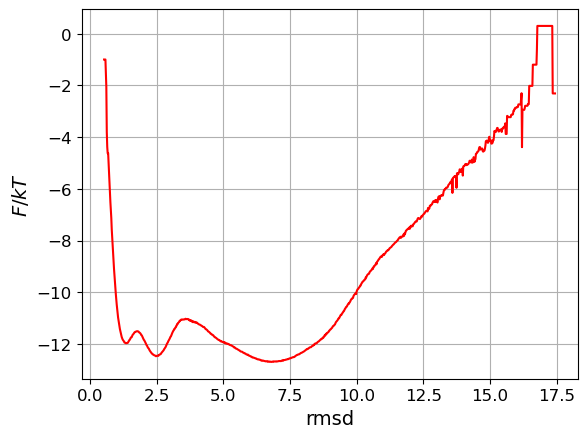

In [4]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(1,1)

plots.plot_fep(ax,rmsd,xlabel='rmsd')

In [5]:
i_traj=np.ones_like(rmsd)
t_traj=np.asarray(range(len(rmsd)))
print (i_traj[:10])
print (t_traj[:10])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 1 2 3 4 5 6 7 8 9]


# Pictures

146.0
#=0, xent=0.61304, mse=0.211291, sdzq=189.223, dzq=528.868, dr2=4758.04, auc=0.716634, |dx|=0.0895072, time=4.66834
#=1000, xent=0.224603, mse=0.0585683, sdzq=42.6995, dzq=129.051, dr2=625.115, auc=0.95624, |dx|=0.346488, time=36.174
#=2000, xent=0.216795, mse=0.0572098, sdzq=29.6722, dzq=80.0024, dr2=491.258, auc=0.957757, |dx|=0.0239723, time=67.603
#=3000, xent=0.213124, mse=0.0564422, sdzq=23.9347, dzq=62.7629, dr2=439.749, auc=0.957893, |dx|=0.00931402, time=98.7277
#=4000, xent=0.210517, mse=0.0559105, sdzq=19.9632, dzq=52.035, dr2=403.852, auc=0.958, |dx|=0.00785541, time=129.937
#=5000, xent=0.208308, mse=0.0554112, sdzq=16.8624, dzq=45.1184, dr2=377.885, auc=0.958062, |dx|=0.00723016, time=161.2
#=6000, xent=0.207438, mse=0.0552435, sdzq=15.2538, dzq=41.7315, dr2=361.974, auc=0.958082, |dx|=0.00350527, time=192.526
#=7000, xent=0.206838, mse=0.0551662, sdzq=13.9994, dzq=38.237, dr2=348.786, auc=0.958125, |dx|=0.00315021, time=224.017
#=8000, xent=0.206381, mse=0.0551053,

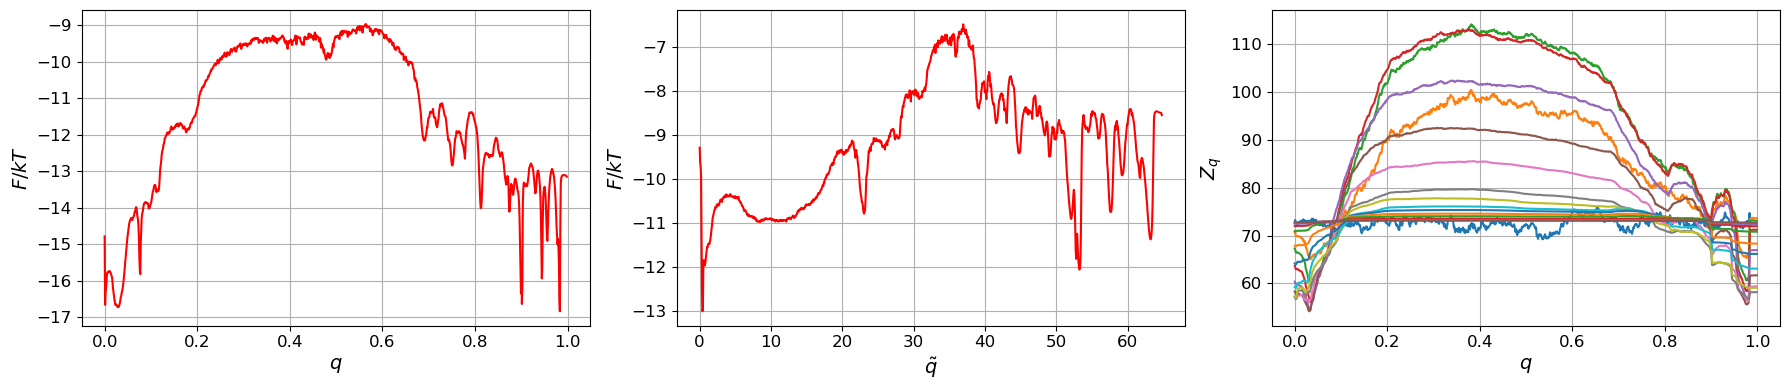

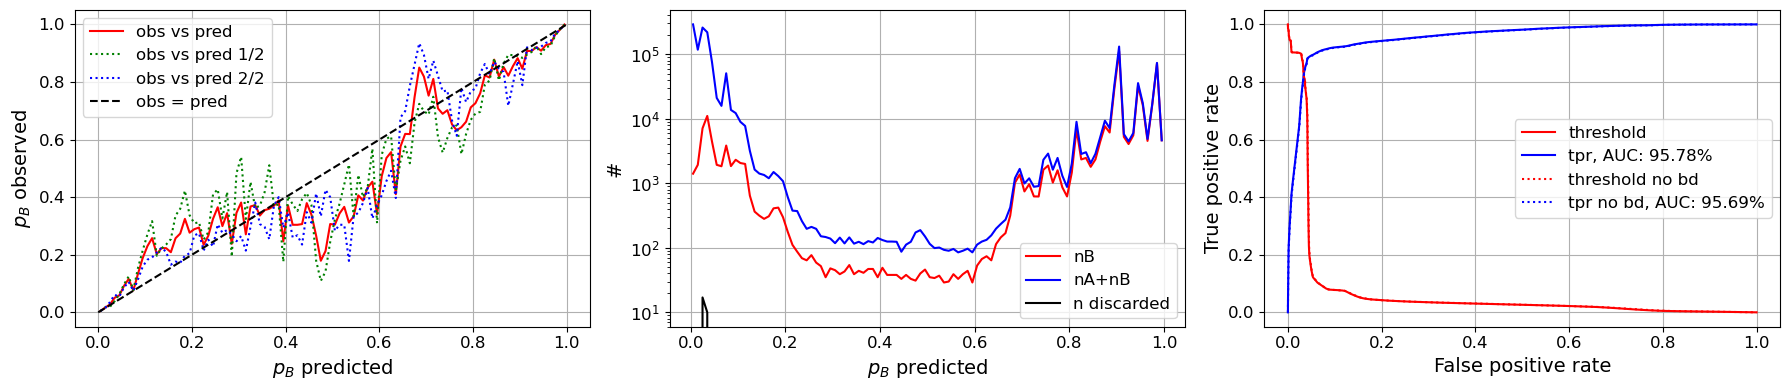

6.54028286712027


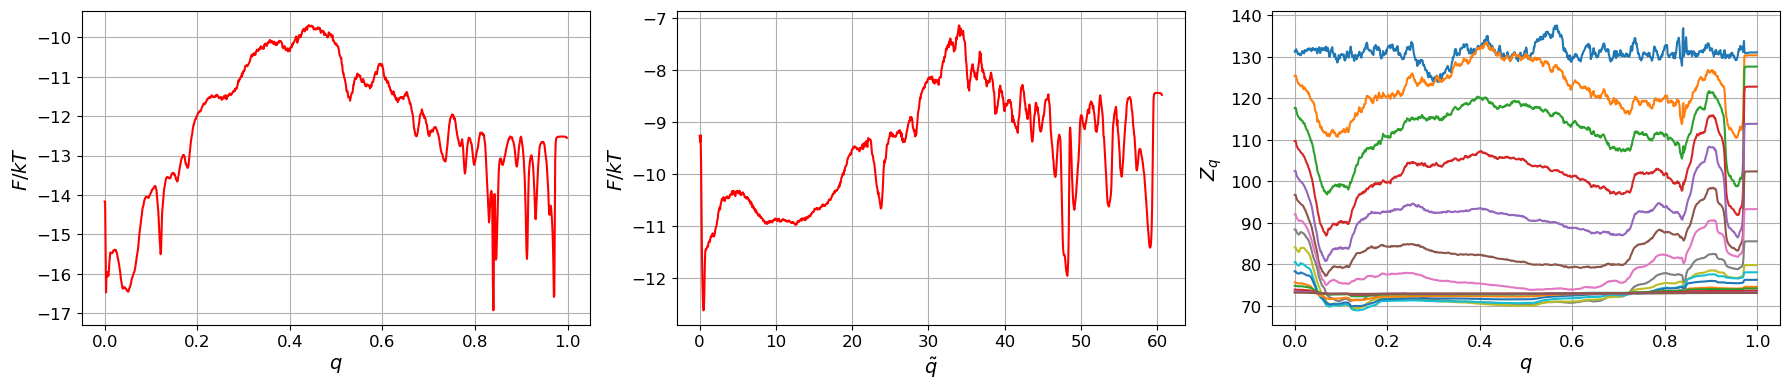

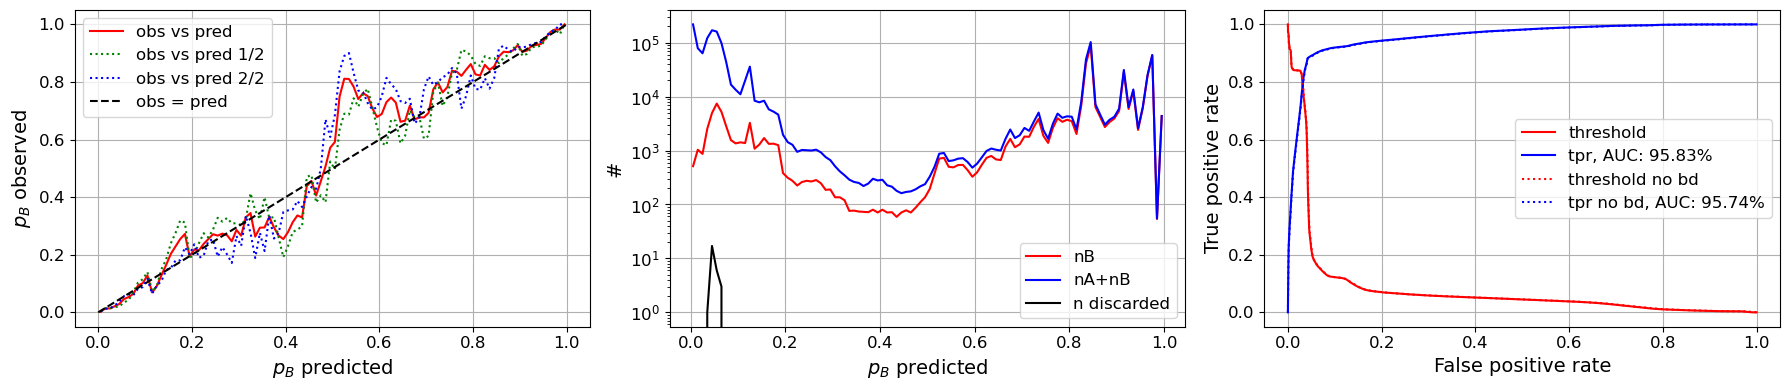

In [6]:
def comp_y():
    while True:
        j1,j2,j3=np.random.choice(range(csdih.shape[1]),3,replace=True)
        if abs(j1//4-j2//4)<=1 and abs(j2//4-j3//4)<=1:break
    a1,a2,a3=np.random.choice([-1,1],3,replace=True)
    return a1*csdih[:,j1]+a2*csdih[:,j2]+a3*csdih[:,j3]

optimalrcs.envelope_scale=0.001

q=optimalrcs.Committor(boundary0=rmsd>10.5,boundary1=rmsd<1.0, i_traj=i_traj, t_traj=t_traj)
print (metrics.low_bound_delta_r2_eq(q).numpy())
np.random.seed(3)
q.fit_transform(comp_y,gamma=0.05,max_iter=100000,min_delta_r2=146)
q.plots_feps()
q.plots_obs_pred()
print (q.min_delta_zq)
q.plots_feps(q.r_traj_min_sd_zq)
q.plots_obs_pred(q.r_traj_min_sd_zq)

6.54028286712027


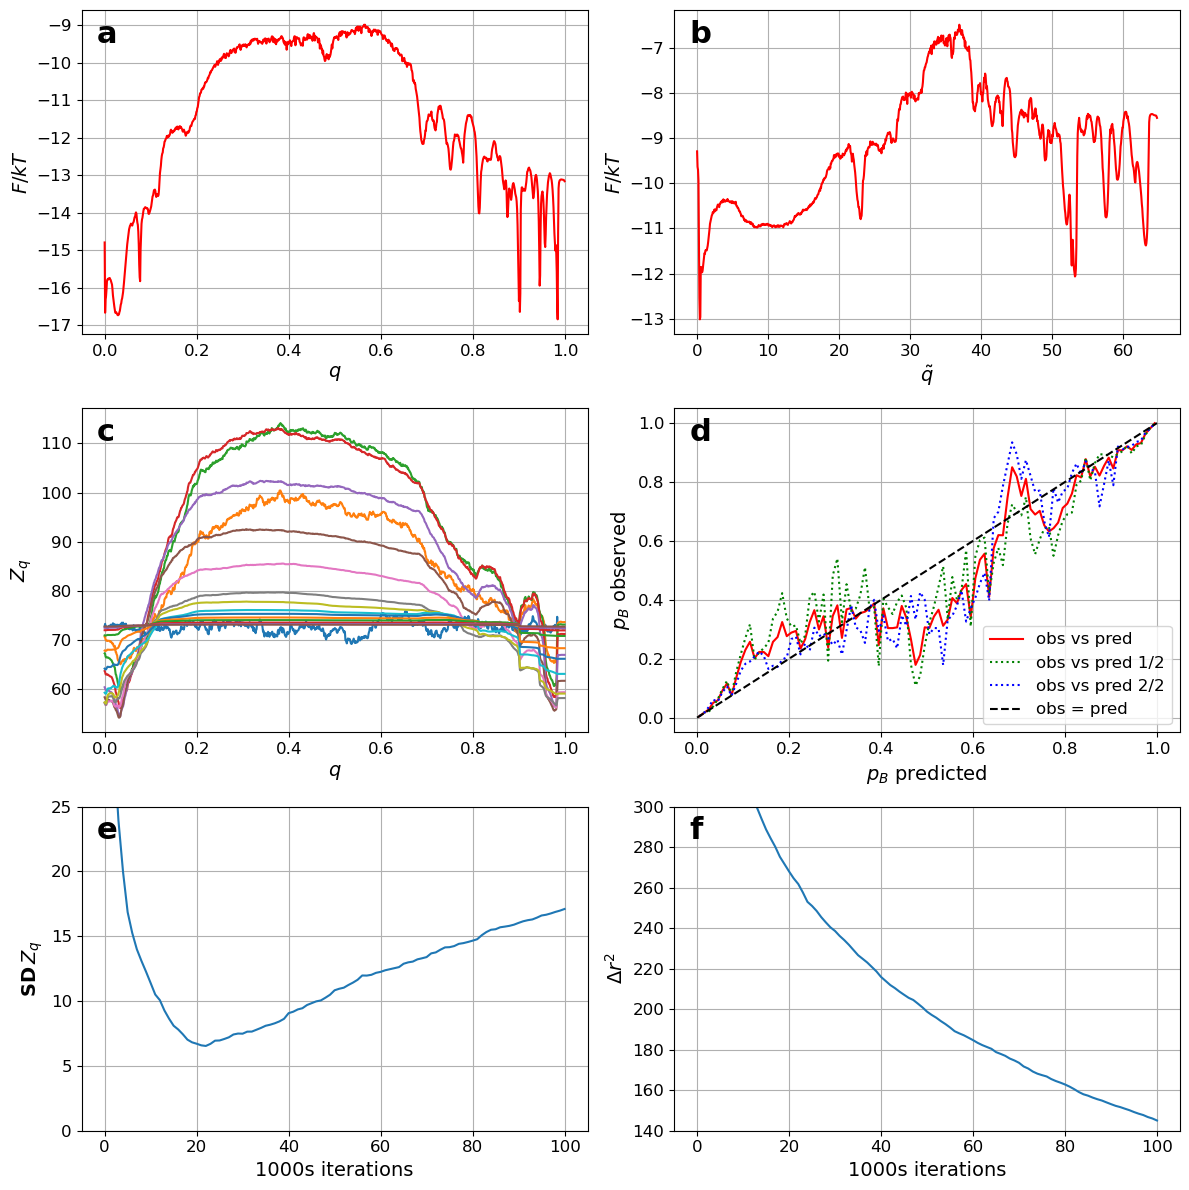

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

letters = ['a', 'b', 'c', 'd', 'e', 'f']
for i, ax in enumerate(axes.flat):
    ax.text(0.03, 0.97, letters[i], transform=ax.transAxes, fontsize=22, fontweight='bold', va='top')

r_traj=q.r_traj.numpy()
#q.r_traj_min_sd_zq
print (q.min_delta_zq)
r_traj=q.r_traj.numpy()
plots.plot_fep(axes[0,0], r_traj)
plots.plot_fep(axes[0,1], r_traj, natural=True, xlabel='$\\tilde{q}$')
plots.plot_zq(axes[1,0], r_traj, q.b_traj, q.i_traj, q.future_boundary, q.past_boundary)
plots.plot_obs_pred_q(axes[1,1], r_traj, q.future_boundary)
axes[1,1].legend(loc='lower right')

axes[2,0].plot(q.metrics_history['max_sd_zq'])
axes[2,0].set(ylim=(0,25),ylabel='$\mathbf{SD}\\, Z_q$', xlabel='1000s iterations')
axes[2,0].grid()

axes[2,1].plot(q.metrics_history['delta_r2'])
axes[2,1].set(ylim=(140,300),ylabel='$ \\Delta r^2 $', xlabel='1000s iterations')
axes[2,1].grid()

fig.tight_layout()
plt.savefig("FigS1.pdf",format='pdf')

[0, 1, 2, 3, 4, 5]
#=0, xent=0.681281, mse=0.245003, sdzq=389.035, dzq=808.822, dr2=4824.36, auc=0.71981, |dx|=0.00624801, time=3.30281
#=1000, xent=0.238917, mse=0.0625779, sdzq=27.6949, dzq=81.2143, dr2=375.444, auc=0.95082, |dx|=0.378202, time=41.315
#=2000, xent=0.222586, mse=0.0586972, sdzq=18.4091, dzq=58.641, dr2=304.245, auc=0.954263, |dx|=0.0329482, time=79.1709
#=3000, xent=0.212731, mse=0.0564605, sdzq=11.5247, dzq=37.249, dr2=249.253, auc=0.955596, |dx|=0.0224893, time=116.635
#=4000, xent=0.208707, mse=0.0555834, sdzq=9.39748, dzq=28.4727, dr2=225.277, auc=0.956407, |dx|=0.0123368, time=154.041
#=5000, xent=0.206249, mse=0.0550671, sdzq=7.50026, dzq=21.9591, dr2=208.057, auc=0.95686, |dx|=0.00912548, time=191.796
#=6000, xent=0.204986, mse=0.0548356, sdzq=6.75945, dzq=18.499, dr2=198.207, auc=0.95713, |dx|=0.00760053, time=229.523
#=7000, xent=0.204275, mse=0.0547115, sdzq=6.05812, dzq=16.7187, dr2=193.699, auc=0.957451, |dx|=0.0054188, time=267.458
#=8000, xent=0.20344, m

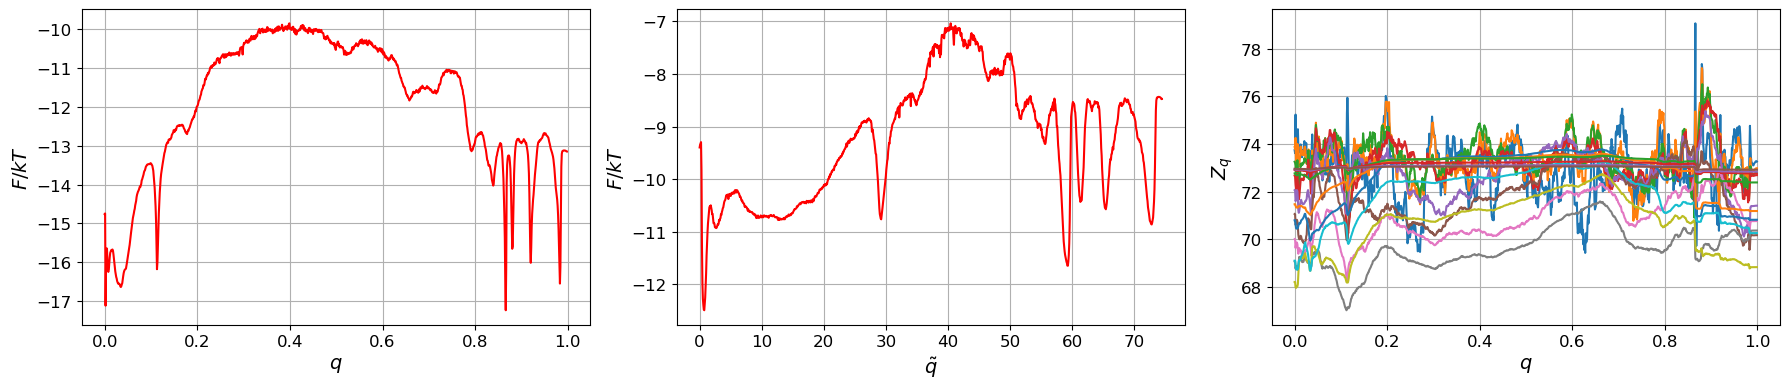

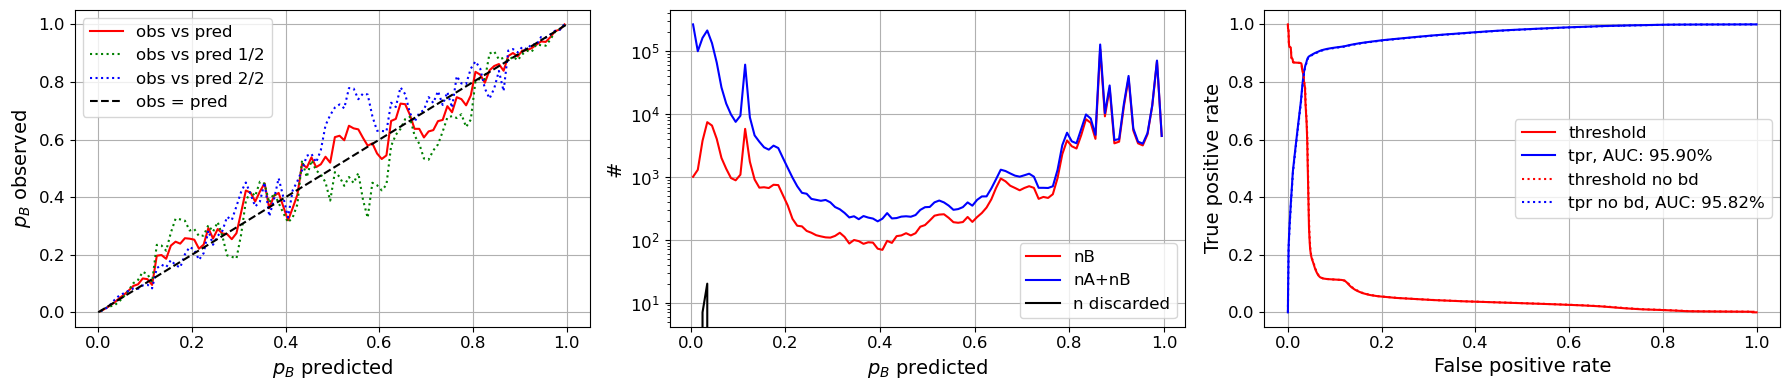

1.1166790489804972


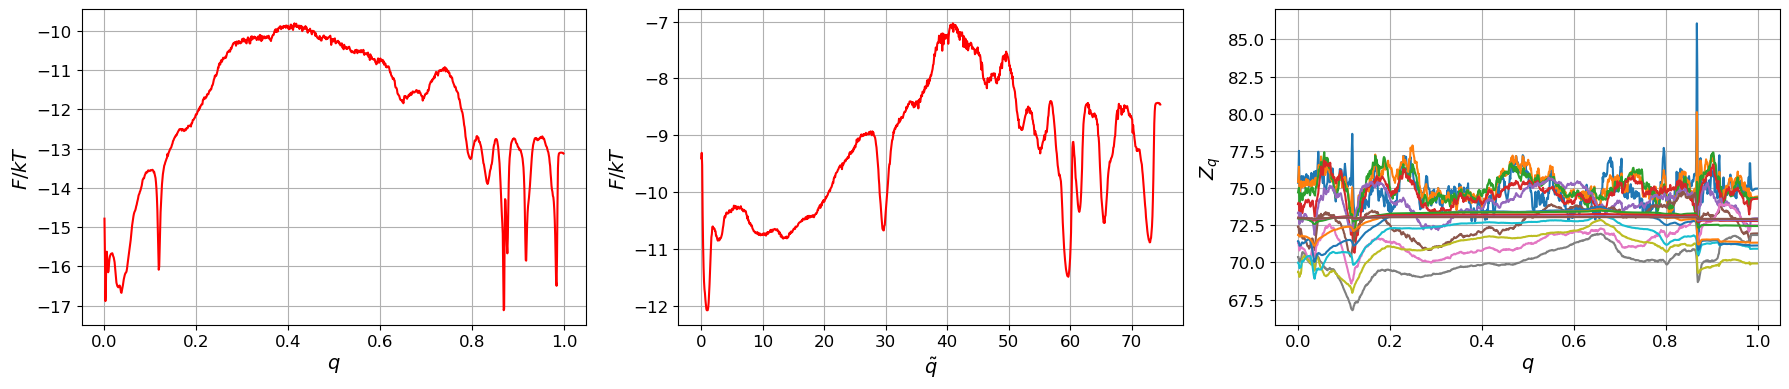

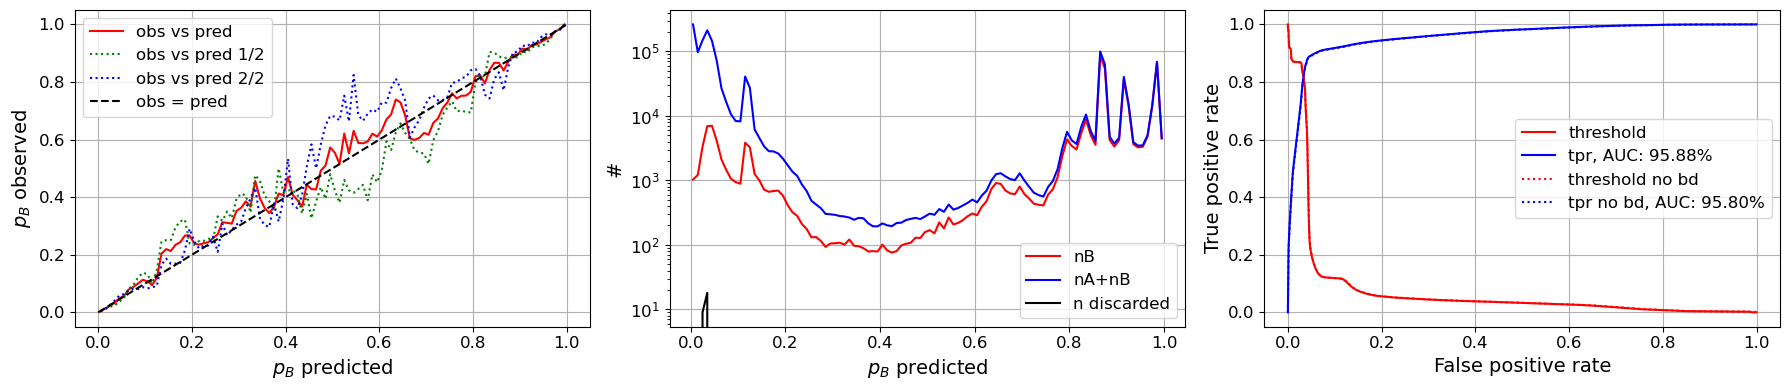

In [8]:
def comp_y():
    while True:
        j1,j2,j3=np.random.choice(range(csdih.shape[1]),3,replace=True)
        if abs(j1//4-j2//4)<=1 and abs(j2//4-j3//4)<=1:break
    a1,a2,a3=np.random.choice([-1,1],3,replace=True)
    return a1*csdih[:,j1]+a2*csdih[:,j2]+a3*csdih[:,j3]

nn=5
gamma=0.2

history=list(range(nn+1))

print (history)
yr_type=['y(t-d),r(t-d)']
optimalrcs.envelope_scale=0.001

q=optimalrcs.CommittorNE(boundary0=rmsd>10.5,boundary1=rmsd<1.0, i_traj=i_traj, t_traj=t_traj)
np.random.seed(3)
q.fit_transform(comp_y,history_delta_t=history,gamma=gamma,max_iter=100000,history_type=yr_type, history_shift_type='r(t)')
q.plots_feps()
q.plots_obs_pred()
print (q.min_delta_zq)
q.plots_feps(q.r_traj_min_sd_zq)
q.plots_obs_pred(q.r_traj_min_sd_zq)

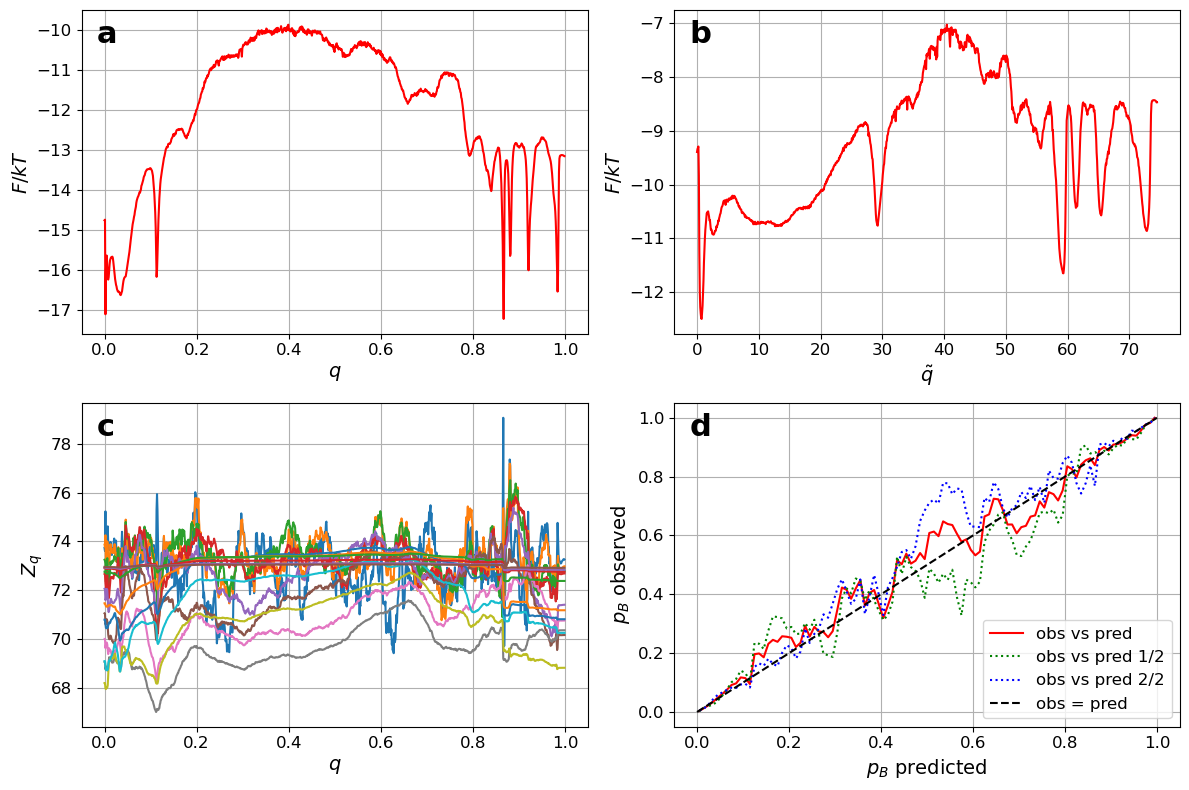

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

letters = ['a', 'b', 'c', 'd', 'e', 'f']
for i, ax in enumerate(axes.flat):
    ax.text(0.03, 0.97, letters[i], transform=ax.transAxes, fontsize=22, fontweight='bold', va='top')

r_traj=q.r_traj.numpy()
plots.plot_fep(axes[0,0], r_traj)
plots.plot_fep(axes[0,1], r_traj, natural=True, xlabel='$\\tilde{q}$')
plots.plot_zq(axes[1,0], r_traj, q.b_traj, q.i_traj, q.future_boundary, q.past_boundary)
plots.plot_obs_pred_q(axes[1,1], r_traj, q.future_boundary)
axes[1,1].legend(loc='lower right')

fig.tight_layout()
plt.savefig("Fig1.pdf",format='pdf')

#=0, xent=0.618161, mse=0.213782, sdzq=190.889, dzq=397.446, dr2=4788.09, auc=0.577254, |dx|=0.08687, time=3.13641
#=1000, xent=0.240928, mse=0.0641893, sdzq=51.6536, dzq=145.841, dr2=735.192, auc=0.95668, |dx|=0.325605, time=29.0455
#=2000, xent=0.237338, mse=0.063033, sdzq=46.3858, dzq=126.444, dr2=661.986, auc=0.956808, |dx|=0.01458, time=54.9597
#=3000, xent=0.236003, mse=0.062755, sdzq=44.3754, dzq=118.984, dr2=638.064, auc=0.956932, |dx|=0.00383078, time=80.7798
#=4000, xent=0.235386, mse=0.062651, sdzq=43.1559, dzq=116.059, dr2=623.056, auc=0.956943, |dx|=0.00277145, time=106.662
#=5000, xent=0.234371, mse=0.0623612, sdzq=42.1981, dzq=112.849, dr2=615.33, auc=0.957022, |dx|=0.00245422, time=132.653
#=6000, xent=0.233718, mse=0.0621879, sdzq=41.5779, dzq=110.49, dr2=608.491, auc=0.957073, |dx|=0.00185526, time=158.517
#=7000, xent=0.233381, mse=0.0622039, sdzq=41.1012, dzq=108.557, dr2=599.002, auc=0.957092, |dx|=0.00280009, time=184.291
#=8000, xent=0.232605, mse=0.0619824, sdzq

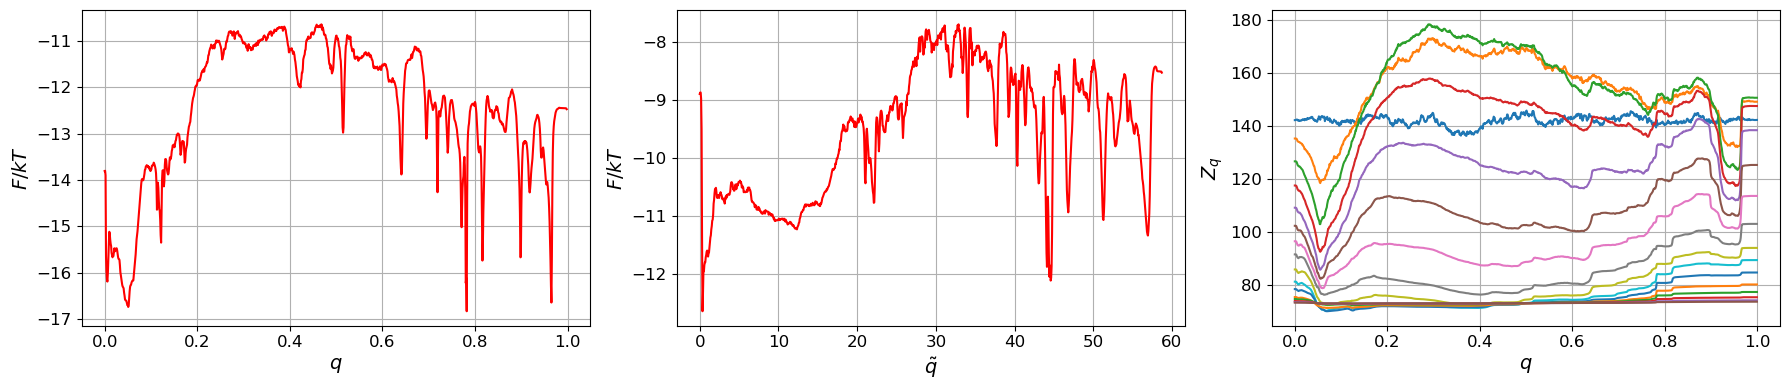

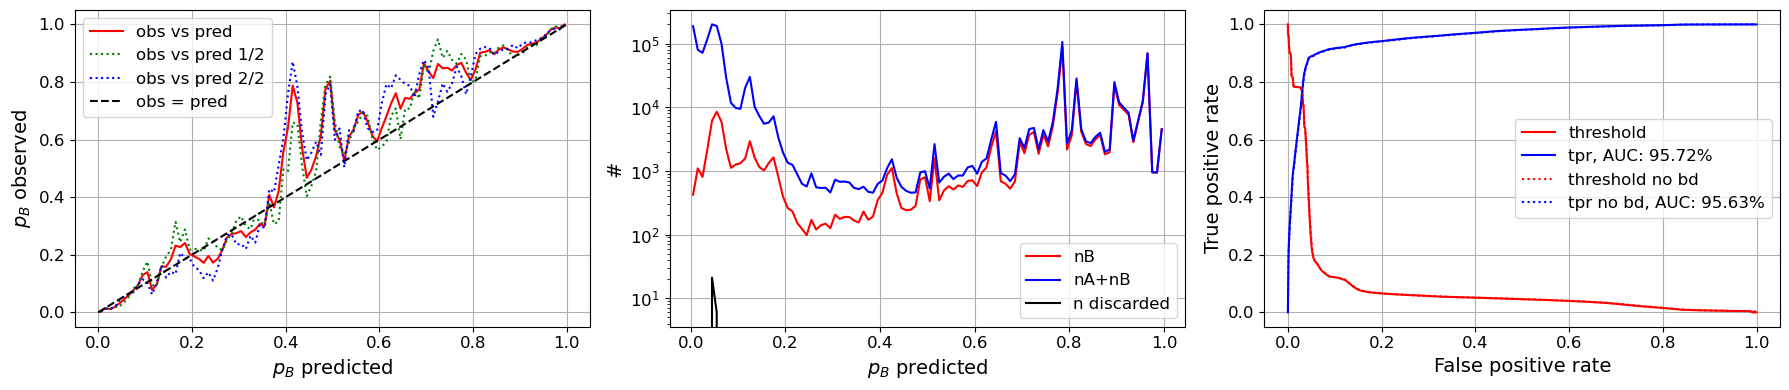

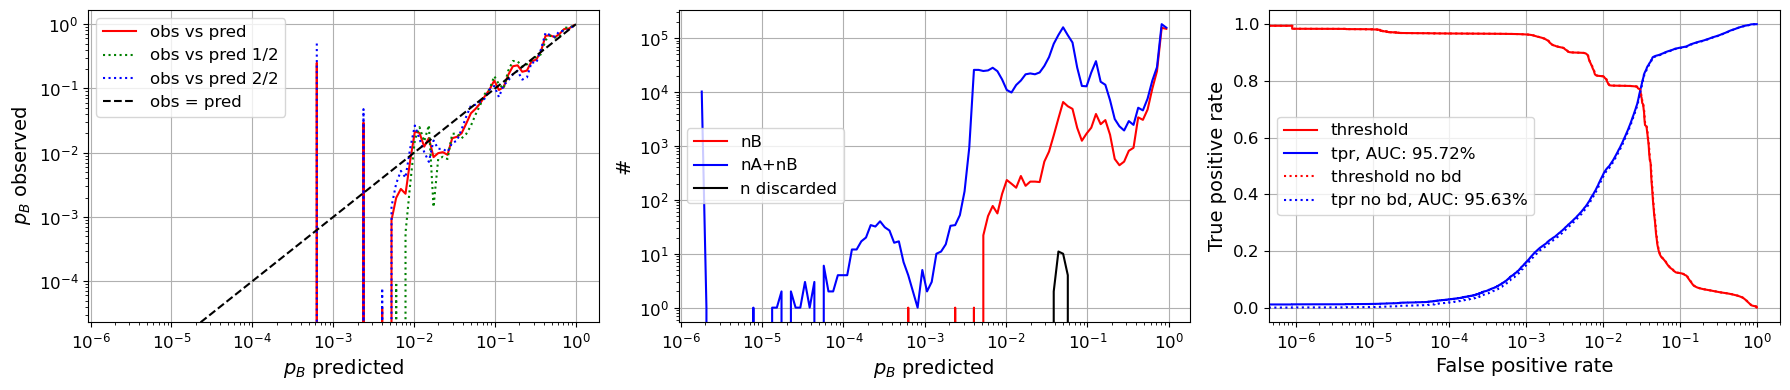

#=535000, xent=0.212501, mse=0.057168, sdzq=15.57, dzq=46.1864, dr2=353.479, auc=0.957195, |dx|=0.00026615, time=20461.1
#=536000, xent=0.21249, mse=0.0571655, sdzq=15.562, dzq=46.1015, dr2=353.357, auc=0.957195, |dx|=0.000198644, time=20500.1
#=537000, xent=0.212479, mse=0.0571632, sdzq=15.5499, dzq=46.0927, dr2=353.201, auc=0.957193, |dx|=0.000220299, time=20537.5
#=538000, xent=0.21248, mse=0.0571657, sdzq=15.5396, dzq=46.0444, dr2=353.037, auc=0.957193, |dx|=0.000216416, time=20575
#=539000, xent=0.212457, mse=0.0571608, sdzq=15.5053, dzq=46.0047, dr2=352.789, auc=0.957194, |dx|=0.000291831, time=20614
#=540000, xent=0.212441, mse=0.0571565, sdzq=15.4973, dzq=46.0465, dr2=352.547, auc=0.957193, |dx|=0.000283985, time=20651.4
#=541000, xent=0.212445, mse=0.0571614, sdzq=15.4755, dzq=46.0772, dr2=352.294, auc=0.957189, |dx|=0.000304426, time=20688.9
#=542000, xent=0.212449, mse=0.0571639, sdzq=15.4512, dzq=46.126, dr2=352.12, auc=0.957186, |dx|=0.000250739, time=20727.9
#=543000, xen

#=602000, xent=0.211639, mse=0.0569721, sdzq=14.4918, dzq=46.0384, dr2=341.316, auc=0.95719, |dx|=0.000277866, time=23008.6
#=603000, xent=0.211609, mse=0.0569639, sdzq=14.4768, dzq=46.0837, dr2=341.124, auc=0.957192, |dx|=0.000271497, time=23047.6
#=604000, xent=0.211609, mse=0.0569645, sdzq=14.4798, dzq=46.0342, dr2=341.037, auc=0.957194, |dx|=0.000179105, time=23085.4
#=605000, xent=0.211593, mse=0.0569601, sdzq=14.45, dzq=45.9216, dr2=340.896, auc=0.957193, |dx|=0.000230748, time=23122.8
#=606000, xent=0.211587, mse=0.0569577, sdzq=14.4453, dzq=45.9732, dr2=340.775, auc=0.957192, |dx|=0.000204799, time=23161.6
#=607000, xent=0.211554, mse=0.0569475, sdzq=14.4273, dzq=46.0527, dr2=340.519, auc=0.957191, |dx|=0.000303661, time=23199.9
#=608000, xent=0.21154, mse=0.0569446, sdzq=14.4088, dzq=46.0947, dr2=340.35, auc=0.957195, |dx|=0.000232433, time=23237.4
#=609000, xent=0.211524, mse=0.0569394, sdzq=14.3988, dzq=46.1002, dr2=340.144, auc=0.957195, |dx|=0.000246556, time=23276.4
#=610

#=669000, xent=0.210667, mse=0.0567247, sdzq=14.3809, dzq=47.2834, dr2=329.336, auc=0.957179, |dx|=0.000283989, time=25560.1
#=670000, xent=0.210648, mse=0.0567183, sdzq=14.3785, dzq=47.2831, dr2=329.201, auc=0.957174, |dx|=0.000228884, time=25597.8
#=671000, xent=0.210609, mse=0.0567056, sdzq=14.3885, dzq=47.2716, dr2=328.929, auc=0.957176, |dx|=0.000330268, time=25636.7
#=672000, xent=0.210611, mse=0.0567071, sdzq=14.4009, dzq=47.3283, dr2=328.872, auc=0.957178, |dx|=0.000161895, time=25674.1
#=673000, xent=0.210611, mse=0.0567074, sdzq=14.4039, dzq=47.3619, dr2=328.788, auc=0.957175, |dx|=0.00015794, time=25711.4
#=674000, xent=0.210607, mse=0.0567064, sdzq=14.3952, dzq=47.3026, dr2=328.715, auc=0.957174, |dx|=0.000152399, time=25750.2
#=675000, xent=0.210579, mse=0.0566973, sdzq=14.4017, dzq=47.292, dr2=328.479, auc=0.957174, |dx|=0.000357462, time=25787.6
#=676000, xent=0.21057, mse=0.0566966, sdzq=14.4217, dzq=47.3705, dr2=328.399, auc=0.95718, |dx|=0.000199727, time=25824.9
#=67

#=736000, xent=0.209939, mse=0.0565485, sdzq=15.0901, dzq=48.4417, dr2=319.294, auc=0.957173, |dx|=0.000253728, time=28108
#=737000, xent=0.209927, mse=0.0565442, sdzq=15.0835, dzq=48.426, dr2=319.113, auc=0.957171, |dx|=0.000226958, time=28145.4
#=738000, xent=0.209904, mse=0.0565363, sdzq=15.0866, dzq=48.4092, dr2=319.006, auc=0.957172, |dx|=0.000223048, time=28183.8
#=739000, xent=0.209908, mse=0.0565399, sdzq=15.0895, dzq=48.4625, dr2=318.929, auc=0.957173, |dx|=0.000174634, time=28222.7
#=740000, xent=0.209891, mse=0.0565345, sdzq=15.1048, dzq=48.4436, dr2=318.743, auc=0.957169, |dx|=0.000252973, time=28260
#=741000, xent=0.20988, mse=0.0565316, sdzq=15.1088, dzq=48.5164, dr2=318.615, auc=0.957169, |dx|=0.000202637, time=28298.1
#=742000, xent=0.209868, mse=0.0565278, sdzq=15.112, dzq=48.4905, dr2=318.482, auc=0.957167, |dx|=0.00020644, time=28337
#=743000, xent=0.209854, mse=0.0565246, sdzq=15.1436, dzq=48.5965, dr2=318.404, auc=0.957171, |dx|=0.000175314, time=28370.1
#=744000, 

#=803000, xent=0.209201, mse=0.056361, sdzq=15.8168, dzq=49.6404, dr2=309.335, auc=0.957169, |dx|=0.000217544, time=30651.9
#=804000, xent=0.209197, mse=0.056361, sdzq=15.8141, dzq=49.6365, dr2=309.293, auc=0.957172, |dx|=0.000119199, time=30689.1
#=805000, xent=0.209195, mse=0.0563614, sdzq=15.8263, dzq=49.6024, dr2=309.171, auc=0.957171, |dx|=0.000194168, time=30728.1
#=806000, xent=0.209181, mse=0.0563563, sdzq=15.8297, dzq=49.6353, dr2=309.055, auc=0.957167, |dx|=0.000212453, time=30766.1
#=807000, xent=0.209175, mse=0.0563559, sdzq=15.8451, dzq=49.7008, dr2=308.908, auc=0.95717, |dx|=0.000218772, time=30803.6
#=808000, xent=0.209161, mse=0.056353, sdzq=15.893, dzq=49.7716, dr2=308.783, auc=0.957171, |dx|=0.000241624, time=30842.3
#=809000, xent=0.209151, mse=0.0563489, sdzq=15.8645, dzq=49.7159, dr2=308.586, auc=0.957172, |dx|=0.000261638, time=30880.9
#=810000, xent=0.209137, mse=0.0563448, sdzq=15.8705, dzq=49.7575, dr2=308.512, auc=0.957172, |dx|=0.000180861, time=30918.4
#=811

#=870000, xent=0.208557, mse=0.0561995, sdzq=16.6107, dzq=51.1061, dr2=300.517, auc=0.957168, |dx|=0.000284487, time=33204.4
#=871000, xent=0.208556, mse=0.0561994, sdzq=16.6241, dzq=51.0425, dr2=300.4, auc=0.957161, |dx|=0.000207212, time=33241.8
#=872000, xent=0.208551, mse=0.0561982, sdzq=16.6508, dzq=51.2223, dr2=300.272, auc=0.957165, |dx|=0.000228709, time=33279.2
#=873000, xent=0.20853, mse=0.0561918, sdzq=16.6652, dzq=51.1732, dr2=300.107, auc=0.957164, |dx|=0.000242907, time=33318
#=874000, xent=0.20853, mse=0.0561932, sdzq=16.6711, dzq=51.171, dr2=299.961, auc=0.957162, |dx|=0.000223437, time=33355.5
#=875000, xent=0.208531, mse=0.0561947, sdzq=16.6879, dzq=51.2131, dr2=299.824, auc=0.957161, |dx|=0.000236892, time=33392.9
#=876000, xent=0.20851, mse=0.0561886, sdzq=16.7087, dzq=51.182, dr2=299.549, auc=0.957158, |dx|=0.000327511, time=33431.7
#=877000, xent=0.208518, mse=0.0561946, sdzq=16.723, dzq=51.2731, dr2=299.466, auc=0.95716, |dx|=0.000209536, time=33469.3
#=878000, x

#=936000, xent=0.207965, mse=0.056052, sdzq=17.4409, dzq=52.5916, dr2=291.6, auc=0.957169, |dx|=0.000283369, time=35668.2
#=937000, xent=0.207981, mse=0.0560582, sdzq=17.4348, dzq=52.5662, dr2=291.534, auc=0.95717, |dx|=0.000198565, time=35704.8
#=938000, xent=0.207977, mse=0.0560573, sdzq=17.4406, dzq=52.5568, dr2=291.45, auc=0.95717, |dx|=0.000167505, time=35741.3
#=939000, xent=0.207965, mse=0.0560535, sdzq=17.4695, dzq=52.569, dr2=291.283, auc=0.957172, |dx|=0.000239402, time=35779
#=940000, xent=0.207953, mse=0.0560515, sdzq=17.4768, dzq=52.569, dr2=291.184, auc=0.957174, |dx|=0.00018161, time=35815.6
#=941000, xent=0.207953, mse=0.0560511, sdzq=17.4972, dzq=52.6146, dr2=291.073, auc=0.957169, |dx|=0.000183344, time=35853.6
#=942000, xent=0.207952, mse=0.0560517, sdzq=17.4927, dzq=52.5944, dr2=291.02, auc=0.957172, |dx|=0.000143756, time=35891.3
#=943000, xent=0.207954, mse=0.0560523, sdzq=17.5011, dzq=52.6474, dr2=290.959, auc=0.957168, |dx|=0.000147954, time=35927.9
#=944000, xe

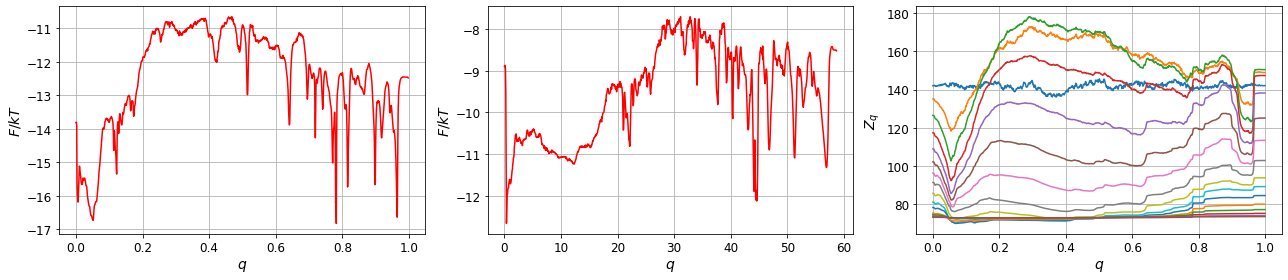

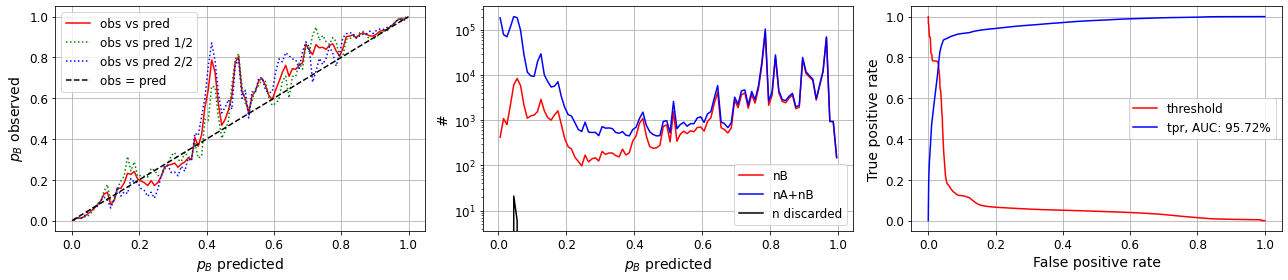

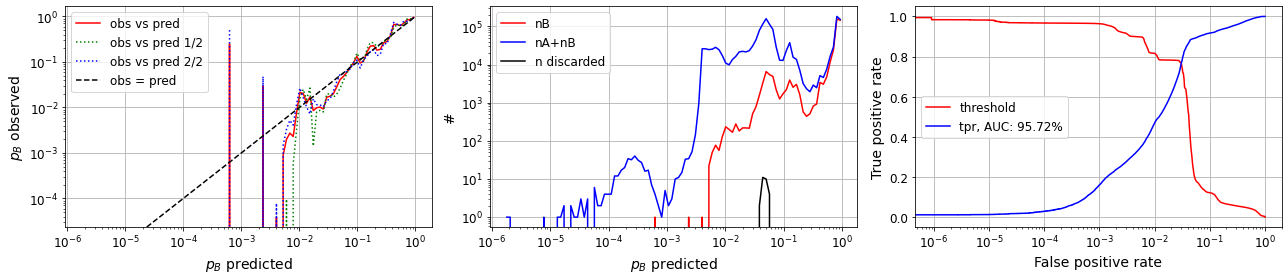

In [10]:
def comp_y():  return csdih[:,np.random.randint(csdih.shape[1])]
optimalrcs.envelope_scale=0.001

q=optimalrcs.Committor(boundary0=rmsd>10.5,boundary1=rmsd<1.0, i_traj=i_traj, t_traj=t_traj)
np.random.seed(8)
q.fit_transform(comp_y,gamma=0.05,max_iter=1000000)


q.plots_feps()
q.plots_obs_pred()
q.plots_obs_pred(log_scale=True)

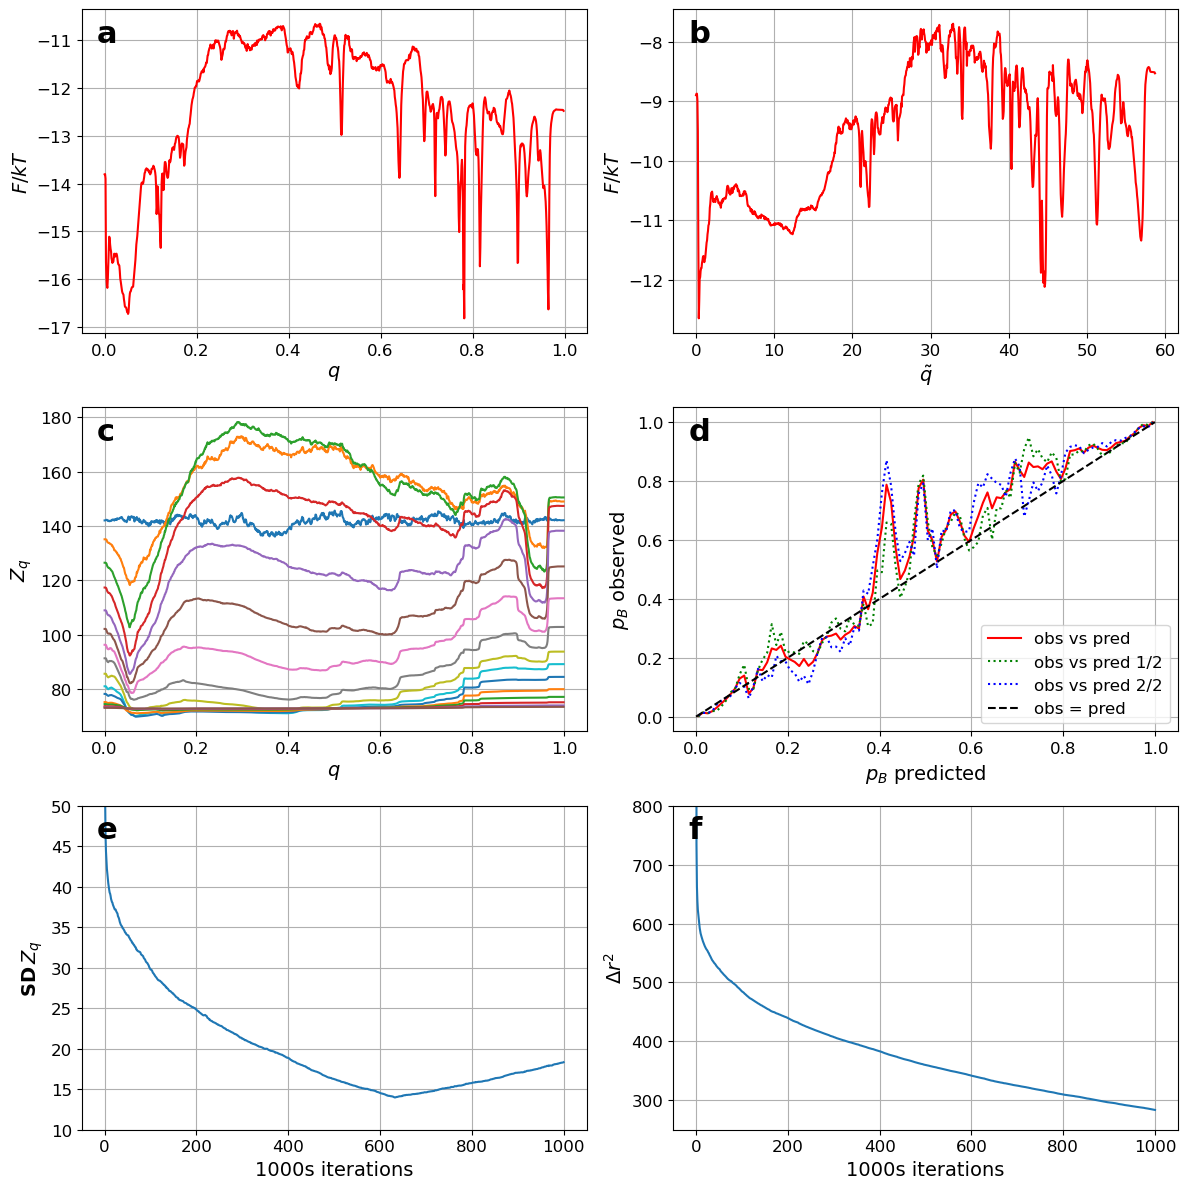

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.text(0.03, 0.97, letters[i], transform=ax.transAxes, fontsize=22, fontweight='bold', va='top')

r_traj=q.r_traj.numpy()
plots.plot_fep(axes[0,0], r_traj)
plots.plot_fep(axes[0,1], r_traj, natural=True, xlabel='$\\tilde{q}$')
plots.plot_zq(axes[1,0], r_traj, q.b_traj, q.i_traj, q.future_boundary, q.past_boundary)
plots.plot_obs_pred_q(axes[1,1], r_traj, q.future_boundary)
axes[1,1].legend(loc='lower right')

axes[2,0].plot(q.metrics_history['max_sd_zq'])
axes[2,0].set(ylim=(10,50),ylabel='$\mathbf{SD}\\, Z_q$', xlabel='1000s iterations')
axes[2,0].grid()

axes[2,1].plot(q.metrics_history['delta_r2'])
axes[2,1].set(ylim=(250,800),ylabel='$ \\Delta r^2 $', xlabel='1000s iterations')
axes[2,1].grid()


fig.tight_layout()
plt.savefig("FigS2.pdf",format='pdf')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#=0, xent=0.683109, mse=0.245916, sdzq=412.449, dzq=846.852, dr2=4917.38, auc=0.584281, |dx|=0.00429258, time=2.75407
#=1000, xent=0.238468, mse=0.0653674, sdzq=15.0644, dzq=48.4234, dr2=273.353, auc=0.94994, |dx|=0.393597, time=34.8885
#=2000, xent=0.228471, mse=0.0619799, sdzq=13.0115, dzq=54.3155, dr2=283.477, auc=0.952955, |dx|=0.0275404, time=67.0453
#=3000, xent=0.218795, mse=0.0592717, sdzq=10.563, dzq=51.4115, dr2=233.191, auc=0.954523, |dx|=0.0222143, time=99.2961
#=4000, xent=0.214842, mse=0.0581505, sdzq=7.67736, dzq=23.8142, dr2=204.171, auc=0.954923, |dx|=0.0131699, time=131.725
#=5000, xent=0.211811, mse=0.0572602, sdzq=7.16688, dzq=21.4107, dr2=192.92, auc=0.955464, |dx|=0.0120301, time=163.982
#=6000, xent=0.209157, mse=0.0565011, sdzq=5.20398, dzq=17.9012, dr2=186.245, auc=0.955935, |dx|=0.0105921, time=196.213
#=7000, xent=0.20703, mse=0.0558433, sdzq=4.4131, dzq=13.4095, dr2=169.061, auc=0.956323, |dx|=0.0113093, time=228.419
#=8000

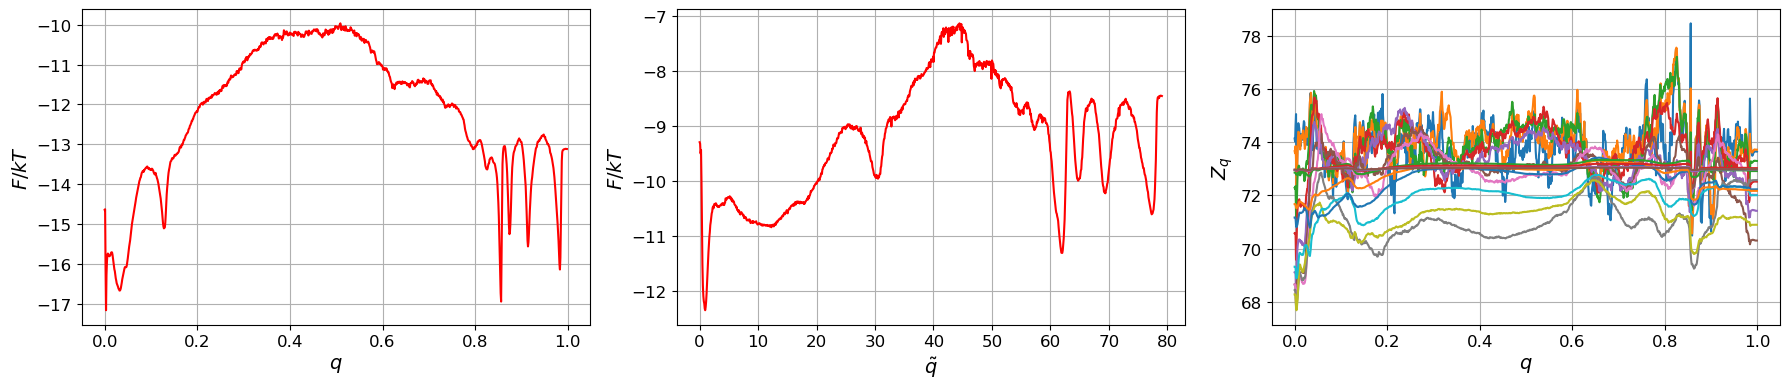

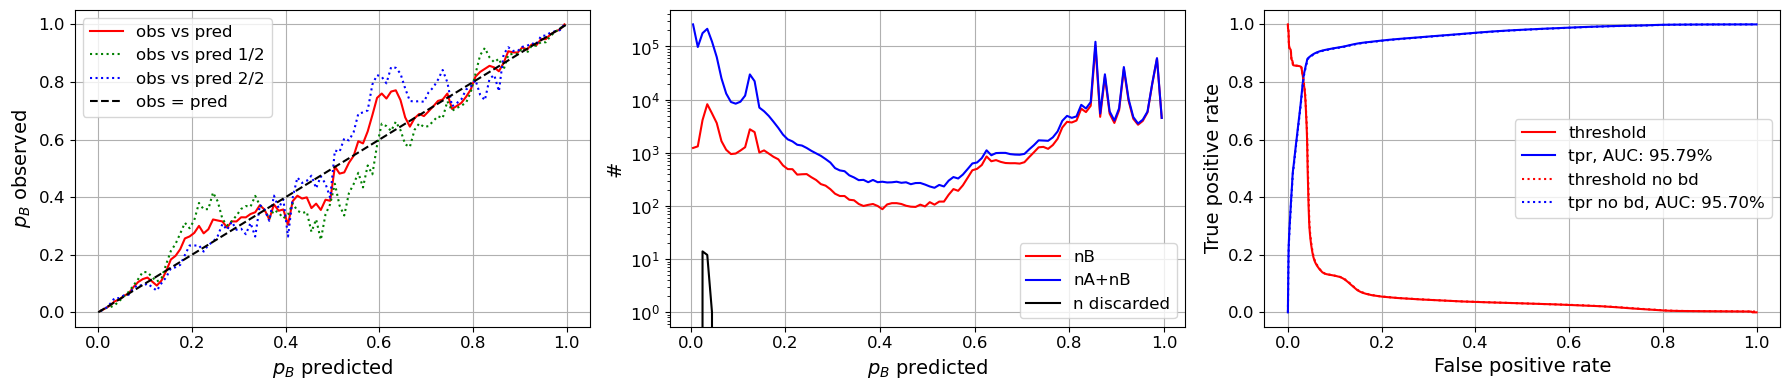

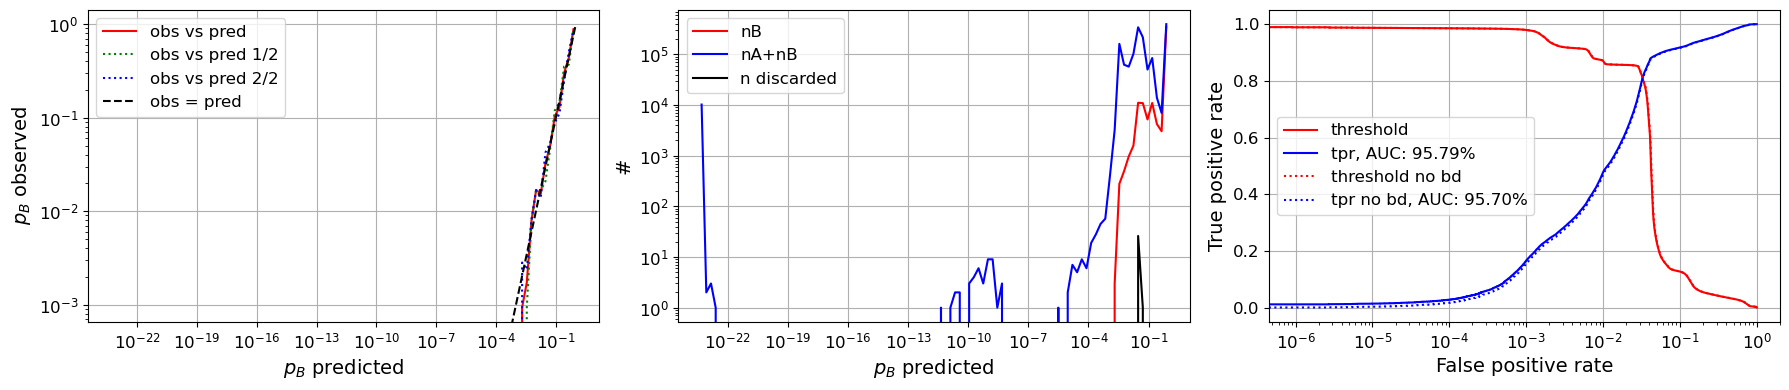

In [12]:
def comp_y():  return csdih[:,np.random.randint(csdih.shape[1])]
optimalrcs.envelope_scale=0.001
history=list(range(11))
print (history)
yr_type=['y(t-d),r(t-d)']


q=optimalrcs.CommittorNE(boundary0=rmsd>10.5,boundary1=rmsd<1.0, i_traj=i_traj, t_traj=t_traj)
np.random.seed(8)
q.fit_transform(comp_y,history_delta_t=history,gamma=0.2,max_iter=45000,history_type=yr_type, history_shift_type='r(t)')


q.plots_feps()
q.plots_obs_pred()
q.plots_obs_pred(log_scale=True)

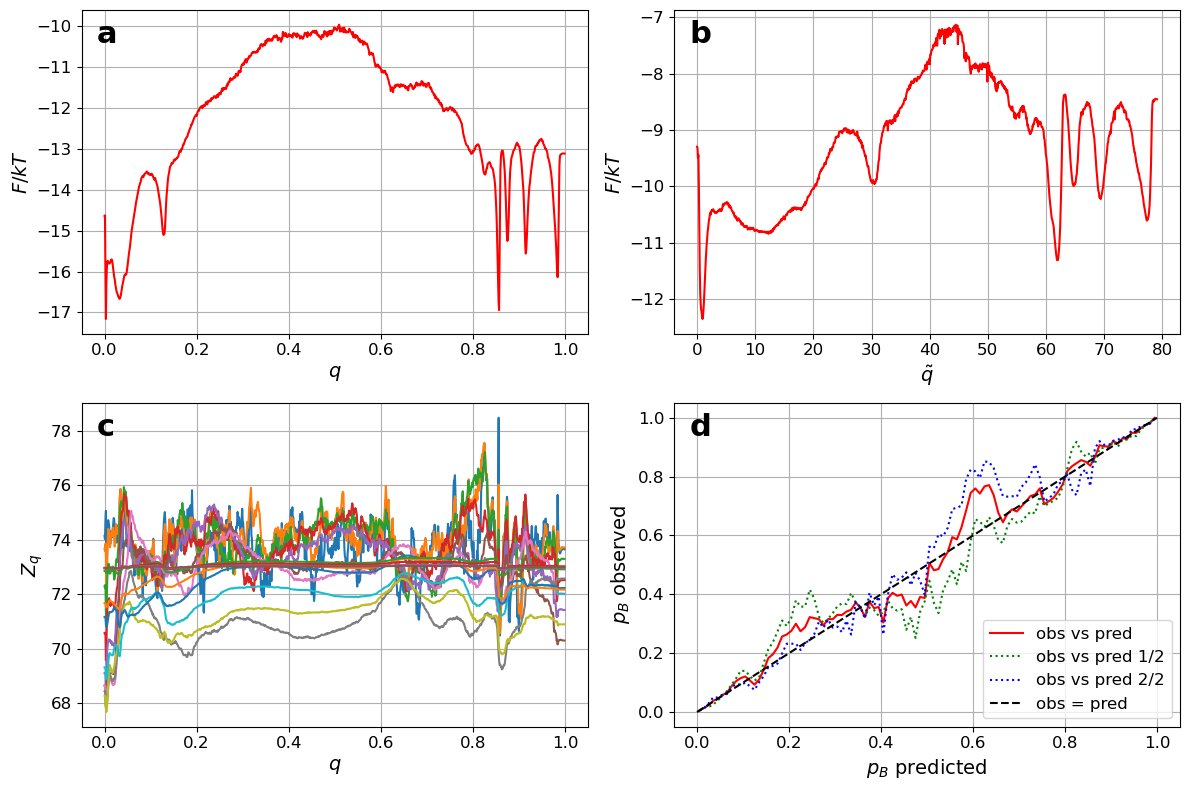

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.text(0.03, 0.97, letters[i], transform=ax.transAxes, fontsize=22, fontweight='bold', va='top')

r_traj=q.r_traj.numpy()
plots.plot_fep(axes[0,0], r_traj)
plots.plot_fep(axes[0,1], r_traj, natural=True, xlabel='$\\tilde{q}$')
plots.plot_zq(axes[1,0], r_traj, q.b_traj, q.i_traj, q.future_boundary, q.past_boundary)
plots.plot_obs_pred_q(axes[1,1], r_traj, q.future_boundary)
axes[1,1].legend(loc='lower right')

fig.tight_layout()
plt.savefig("Fig2.pdf",format='pdf')

[0, 1, 2, 3, 4, 5]
#=0, xent=0.675136, mse=0.241932, sdzq=395.11, dzq=833.848, dr2=4823.8, auc=0.820626, |dx|=0.00977465, time=2.80749
#=1000, xent=0.236374, mse=0.0626604, sdzq=31.4774, dzq=74.2155, dr2=370.306, auc=0.950157, |dx|=0.37705, time=38.6407
#=2000, xent=0.213879, mse=0.0568936, sdzq=16.6078, dzq=39.9606, dr2=246.245, auc=0.954854, |dx|=0.0451788, time=74.6581
#=3000, xent=0.207158, mse=0.0553918, sdzq=10.162, dzq=25.2767, dr2=212.432, auc=0.956814, |dx|=0.0200536, time=110.637
#=4000, xent=0.204603, mse=0.0548529, sdzq=8.13802, dzq=21.1843, dr2=195.562, auc=0.957763, |dx|=0.0107359, time=146.374
#=5000, xent=0.202972, mse=0.054476, sdzq=6.38377, dzq=16.6236, dr2=182.196, auc=0.958001, |dx|=0.00878363, time=182.232
#=6000, xent=0.202295, mse=0.0543138, sdzq=5.93402, dzq=15.5813, dr2=182.152, auc=0.958043, |dx|=0.00674803, time=218.03
#=7000, xent=0.202062, mse=0.0542406, sdzq=5.46662, dzq=14.6768, dr2=179.189, auc=0.958286, |dx|=0.00574992, time=253.925
#=8000, xent=0.20147

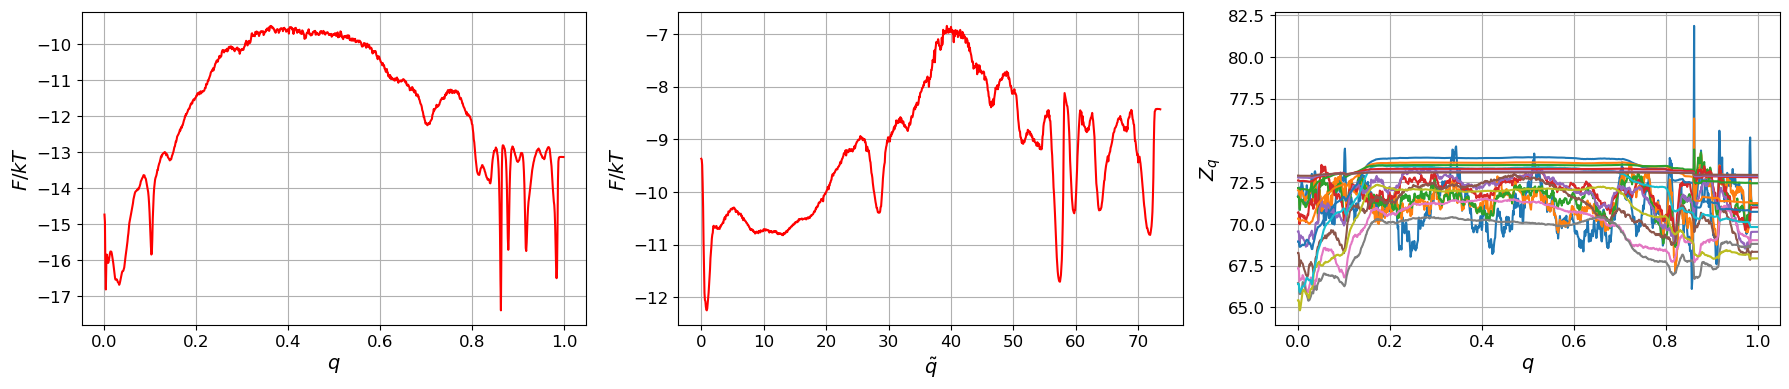

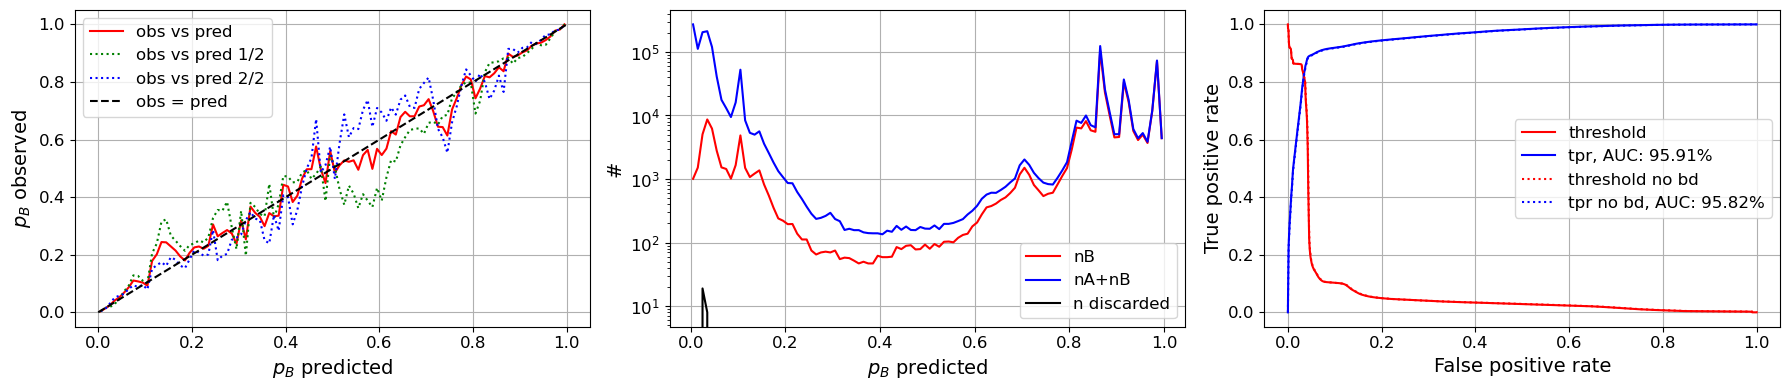

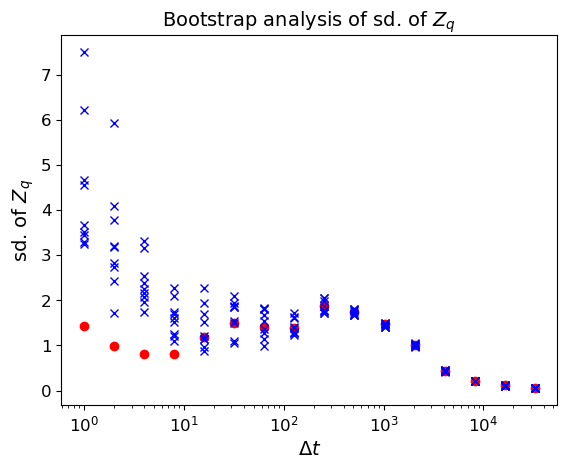

In [14]:
def comp_y():
    while True:
        j1,j2,j3=np.random.choice(range(csdih.shape[1]),3,replace=True)
        if abs(j1//4-j2//4)<=1 and abs(j2//4-j3//4)<=1:break
    return csdih[:,j1]+csdih[:,j2]+csdih[:,j3]
optimalrcs.envelope_scale=0.001
history=list(range(5))
history=list(range(6))

print (history)
yr_type=['y(t-d),r(t-d)']

q=optimalrcs.CommittorNE(boundary0=rmsd>10.5,boundary1=rmsd<1.0, i_traj=i_traj, t_traj=t_traj)
np.random.seed(0)
q.fit_transform(comp_y,history_delta_t=history,gamma=0.1,max_iter=100000,history_type=yr_type, history_shift_type='r(t)')
q.plots_feps()
q.plots_obs_pred()
fig,ax=plt.subplots(1,1)
plots.plot_bootstrap_sd_zq(ax,q.r_traj.numpy(),q.b_traj)

9
11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 (1500000, 136) 333757
4.4942877602567135
[0, 1, 2]
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 

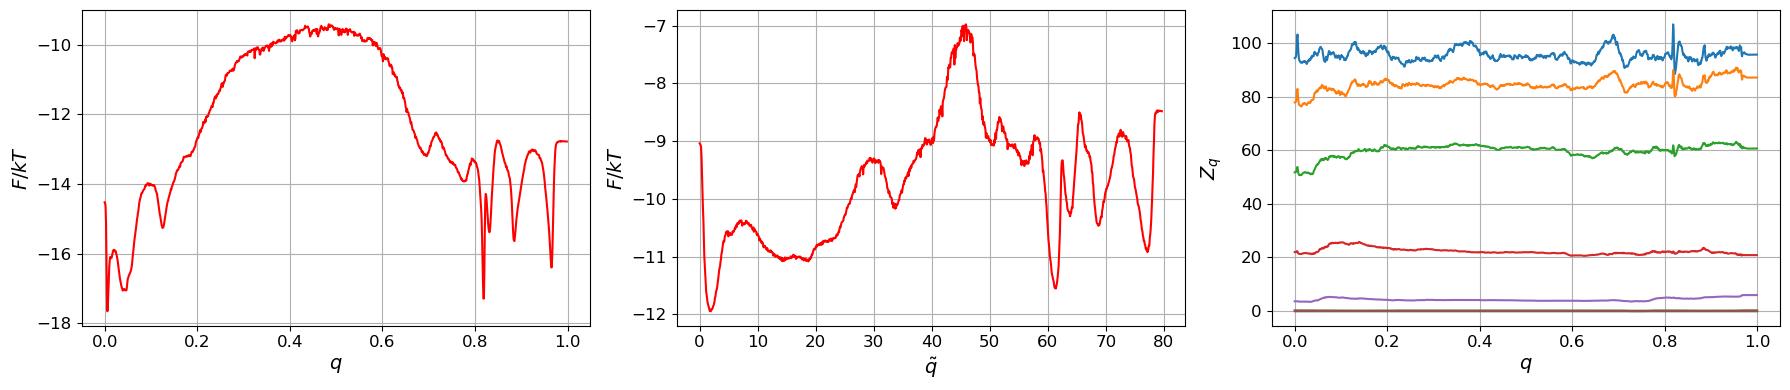

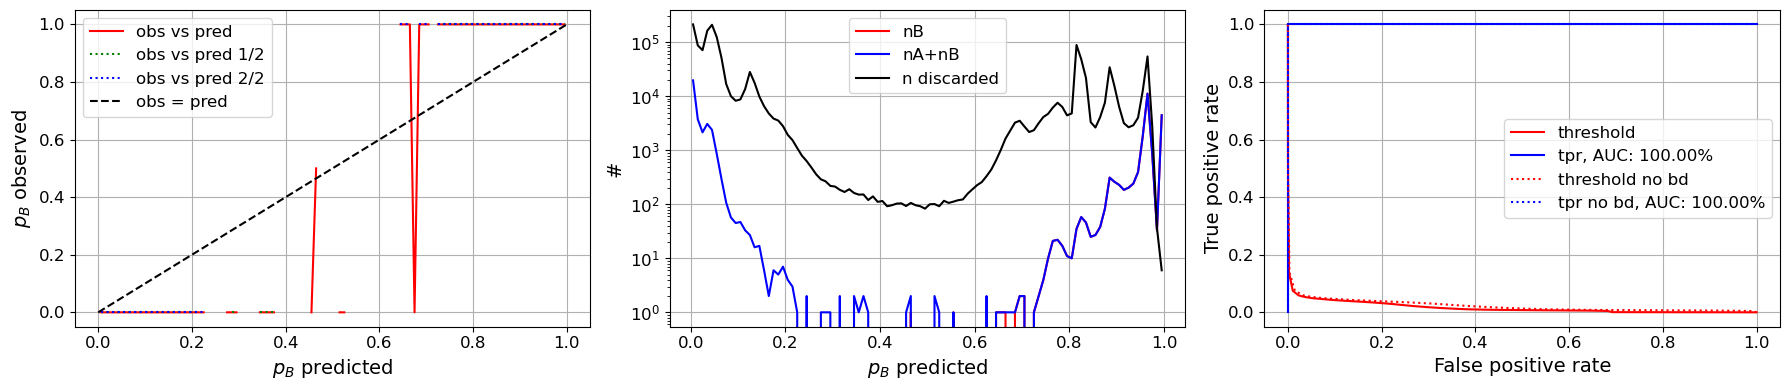

2.3535866027128556


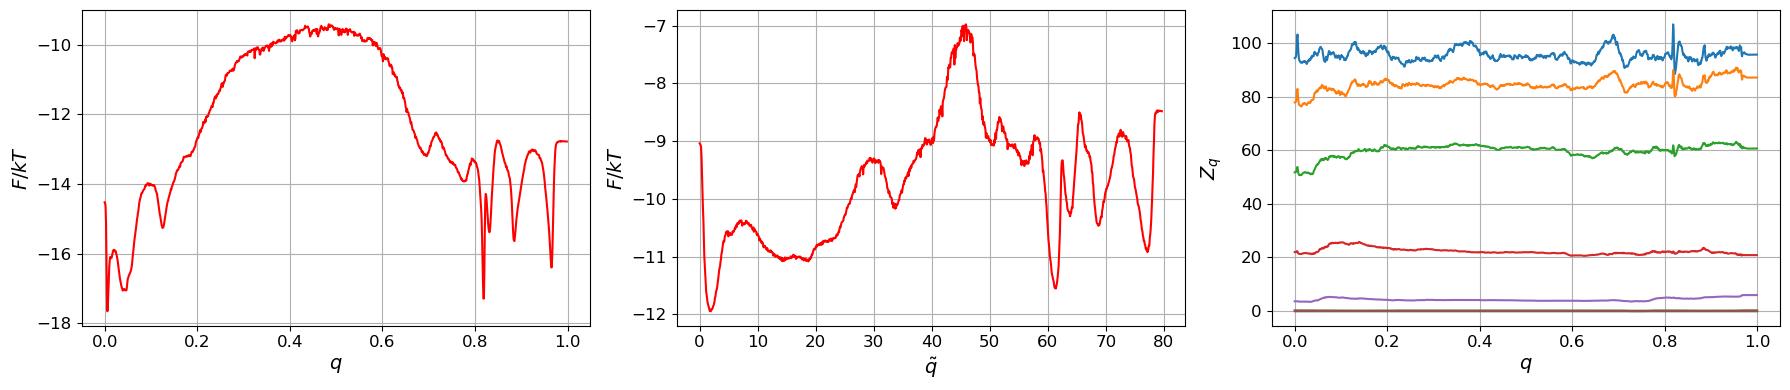

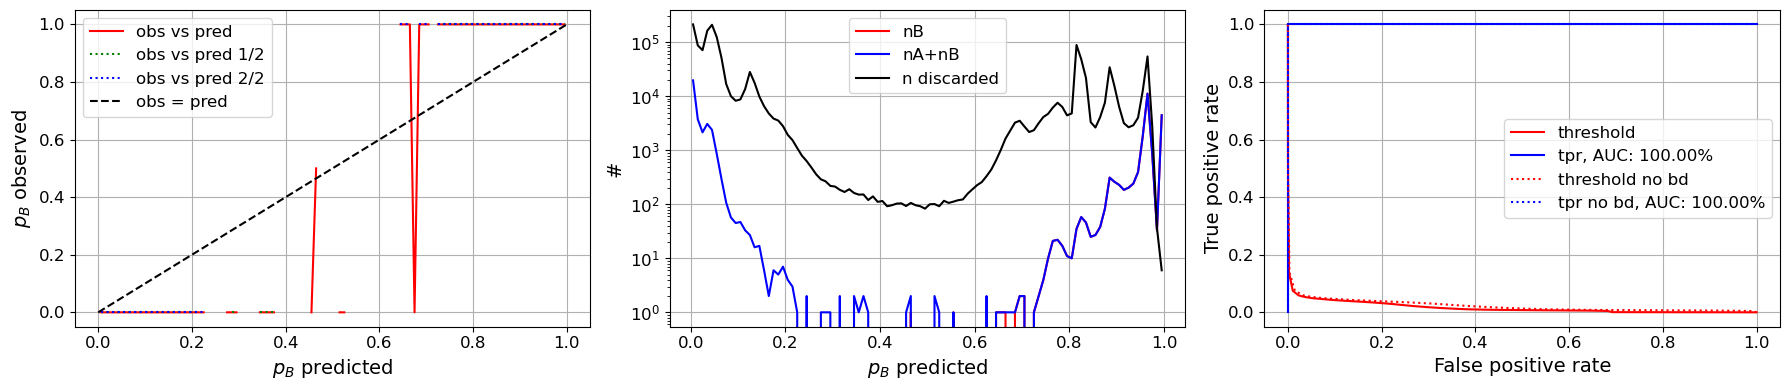

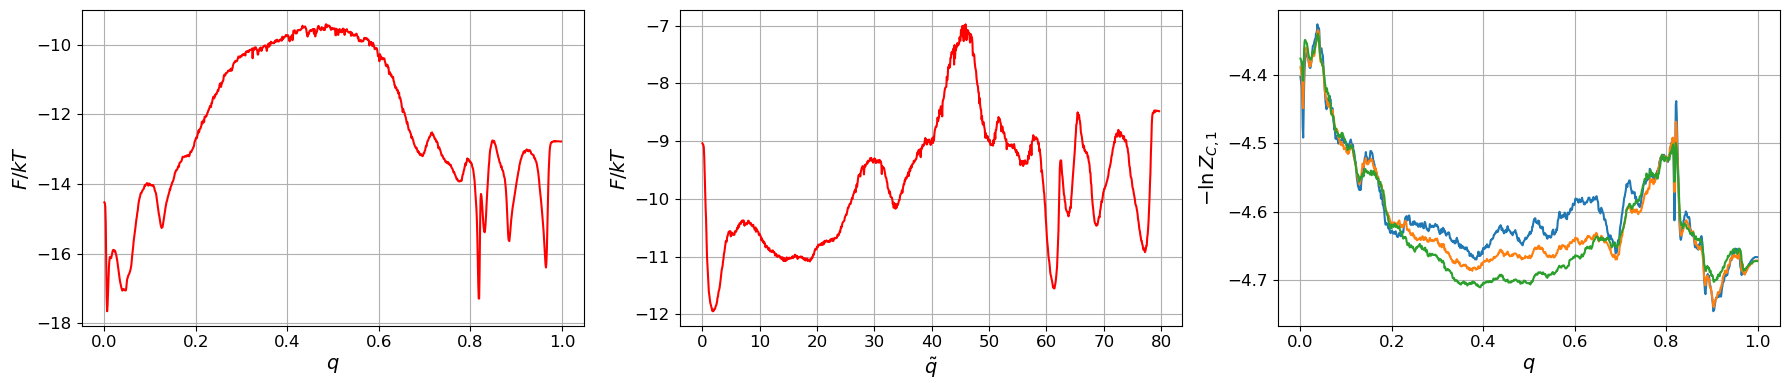

In [15]:
def resample2(len_old, total_len, p_skip_step=0, p_end_traj=0, traj_len=100):
    ind_new = np.zeros(total_len,'int32')
    t_traj_new = np.zeros(total_len,'float64')
    i_traj_new = np.zeros(total_len,'int32')
    k=0
    i_traj=0
    while k<total_len:
        i_traj=i_traj+1
        istart=np.random.randint(len_old-1)
        istart_0=istart
        for i in range(traj_len):
            istart+=1
            if istart==len_old:break
            if np.random.random()<p_end_traj:break
            if np.random.random()<p_skip_step: continue #skip a step
            ind_new[k]=istart
            t_traj_new[k]=istart-istart_0
            i_traj_new[k]=i_traj
            k=k+1
            if k%10000==0:print (k//10000, end=' ')
            if k==total_len:break
    return ind_new, i_traj_new, t_traj_new

def forward_imputation_of_missing_values(X0,p,i_traj):
    X=np.copy(X0)
    for i in range(1,X.shape[0]):
        if i%10000==0:print (i//10000,end=' ')
        if i_traj[i]!=i_traj[i-1]: continue # the first frame, can not impute
        for j in range(X.shape[1]):
            if np.random.random()<p:X[i,j]=X[i-1,j]
    return X

def comp1_y():
    while True:
        j1,j2,j3=np.random.choice(range(X_new.shape[1]),3,replace=True)
        if abs(j1//4-j2//4)<=1 and abs(j2//4-j3//4)<=1:break
    a1,a2,a3=np.random.choice([-1,1],3,replace=True)
    return a1*X_new[:,j1]+a2*X_new[:,j2]+a3*X_new[:,j3]


i=9
print(i)
np.random.seed(i)
ind_new, i_traj_new, t_traj_new=resample2(csdih.shape[0], 1500000, p_skip_step=0.5, p_end_traj=0.1)
X_new=csdih[ind_new,:]
rmsd_new=rmsd[ind_new]
print (X_new.shape,i_traj_new[-1])
print (X_new.shape[0]/i_traj_new[-1])

optimalrcs.envelope_scale=0.001

history=list(range(3))
print (history)
np.random.seed(i)
X_new=forward_imputation_of_missing_values(X_new, 0.3, i_traj_new)
yr_type=['y(t-d),r(t-d)']
q=optimalrcs.CommittorNE(boundary0=rmsd_new>10.5,boundary1=rmsd_new<1.0, i_traj=i_traj_new, t_traj=t_traj_new)
np.random.seed(i)
q.fit_transform(comp1_y,history_delta_t=history,gamma=0.02,max_iter=70000,history_type=yr_type, history_shift_type='r(t0)')
q.plots_feps()
q.plots_obs_pred()
print (q.min_delta_zq)
q.plots_feps(q.r_traj_min_sd_zq)
q.plots_obs_pred(q.r_traj_min_sd_zq)
q.w_traj=np.ones_like(q.r_traj)
q.plots_feps(reweight=True,ldt=[1,2,4],dtmin=4)

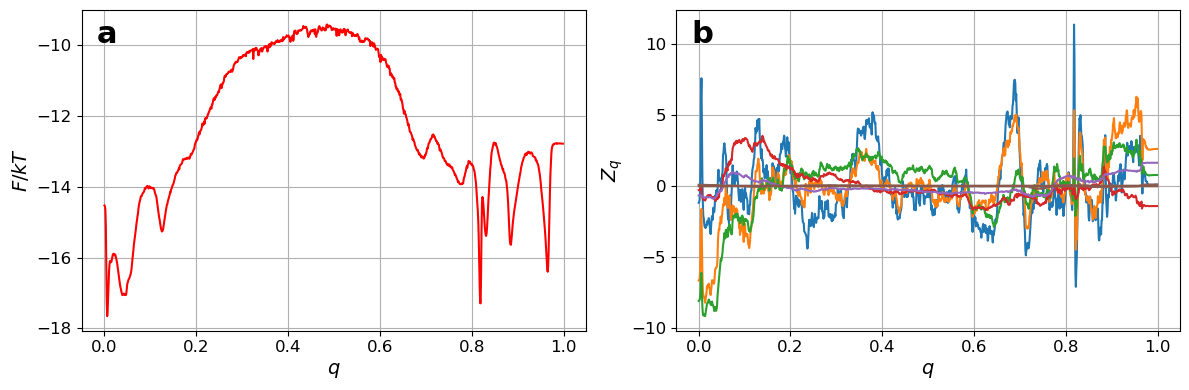

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
letters = ['a', 'b', 'c', 'd', 'e', 'f']
for i, ax in enumerate(axes.flat):
    ax.text(0.03, 0.97, letters[i], transform=ax.transAxes, fontsize=22, fontweight='bold', va='top')

r_traj=q.r_traj.numpy()
plots.plot_fep(axes[0], r_traj, i_traj=q.i_traj, t_traj=q.t_traj)
plots.plot_zq(axes[1], r_traj, q.b_traj, q.i_traj, q.future_boundary, q.past_boundary, forcemean0=True)
fig.tight_layout()
plt.savefig("Fig3b.pdf",format='pdf')

-23589.526573613748
#=0, it=-1103.2, sdzt=318777, dzt=54922.5, |dx|=557.248, time=3.19987
#=1000, it=-1173.84, sdzt=309527, dzt=31077.2, |dx|=39.7594, time=28.5964
#=2000, it=-1173.86, sdzt=309727, dzt=31210, |dx|=0.132773, time=54.0263
#=3000, it=-1173.87, sdzt=309812, dzt=31263.2, |dx|=0.11161, time=79.4707
#=4000, it=-1173.86, sdzt=309840, dzt=31277, |dx|=0.176941, time=104.929
#=5000, it=-1173.87, sdzt=309598, dzt=31142.2, |dx|=0.115308, time=130.364
#=6000, it=-1173.88, sdzt=309544, dzt=31101.5, |dx|=0.0433799, time=155.422
#=7000, it=-1173.88, sdzt=309504, dzt=31066.5, |dx|=0.0359289, time=180.802
#=8000, it=-1173.88, sdzt=309820, dzt=31271.1, |dx|=0.0423489, time=206.292
#=9000, it=-1173.87, sdzt=309578, dzt=31127.4, |dx|=0.0413393, time=231.859
#=10000, it=-1173.88, sdzt=309883, dzt=31303.7, |dx|=0.05314, time=257.303


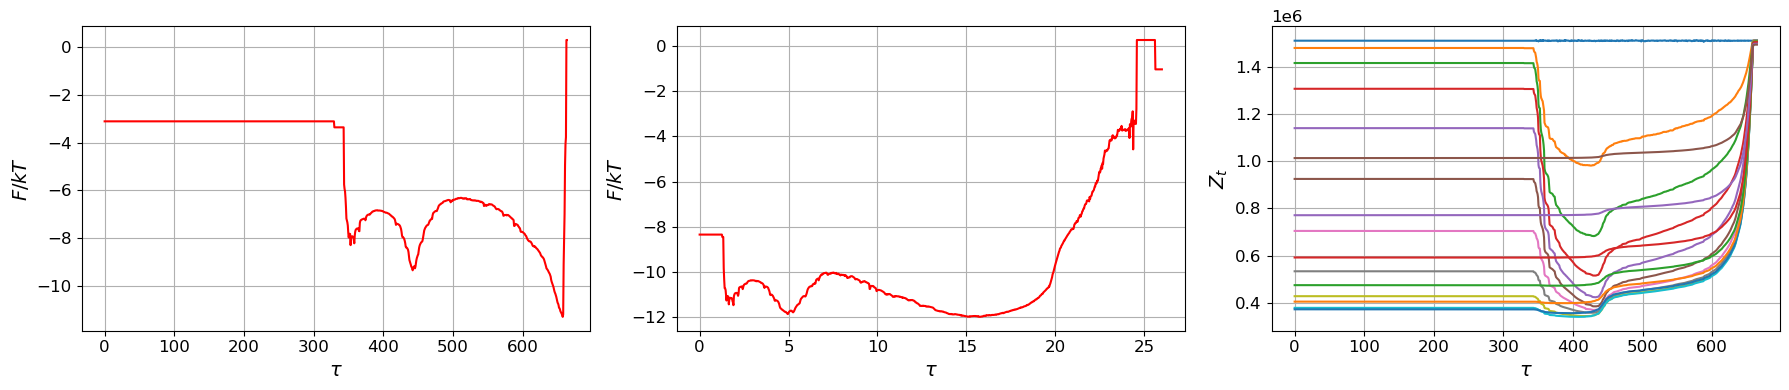

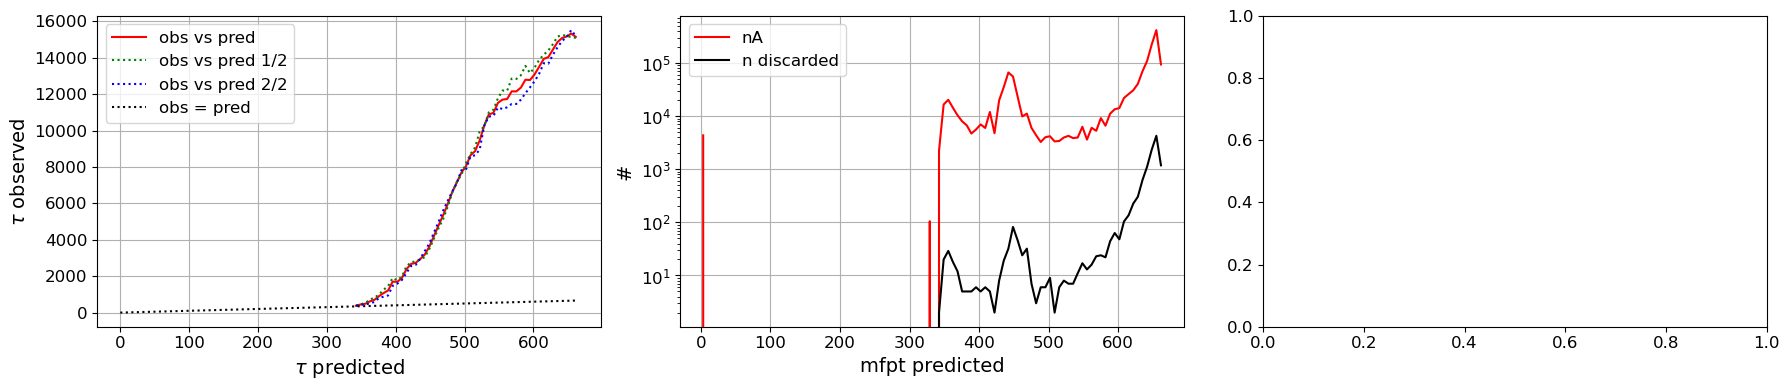

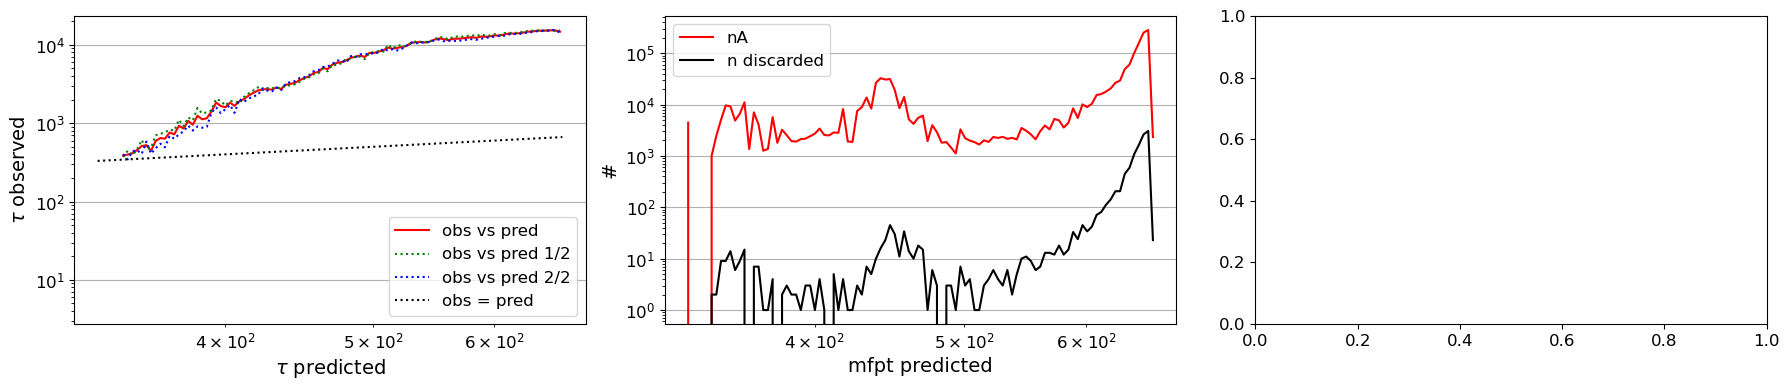

In [17]:
optimalrcs.envelope_scale=0.001

def comp_y(): return rmsd
mfpt0 = optimalrcs.MFPTNE(boundary0=rmsd < 1)
print(metrics.low_bound_i_mfpt_eq(mfpt0))
np.random.seed(0)
mfpt0.fit_transform(comp_y=comp_y, max_iter=10000 )
mfpt0.plots_feps()
mfpt0.plots_obs_pred()
mfpt0.plots_obs_pred(log_scale=True)

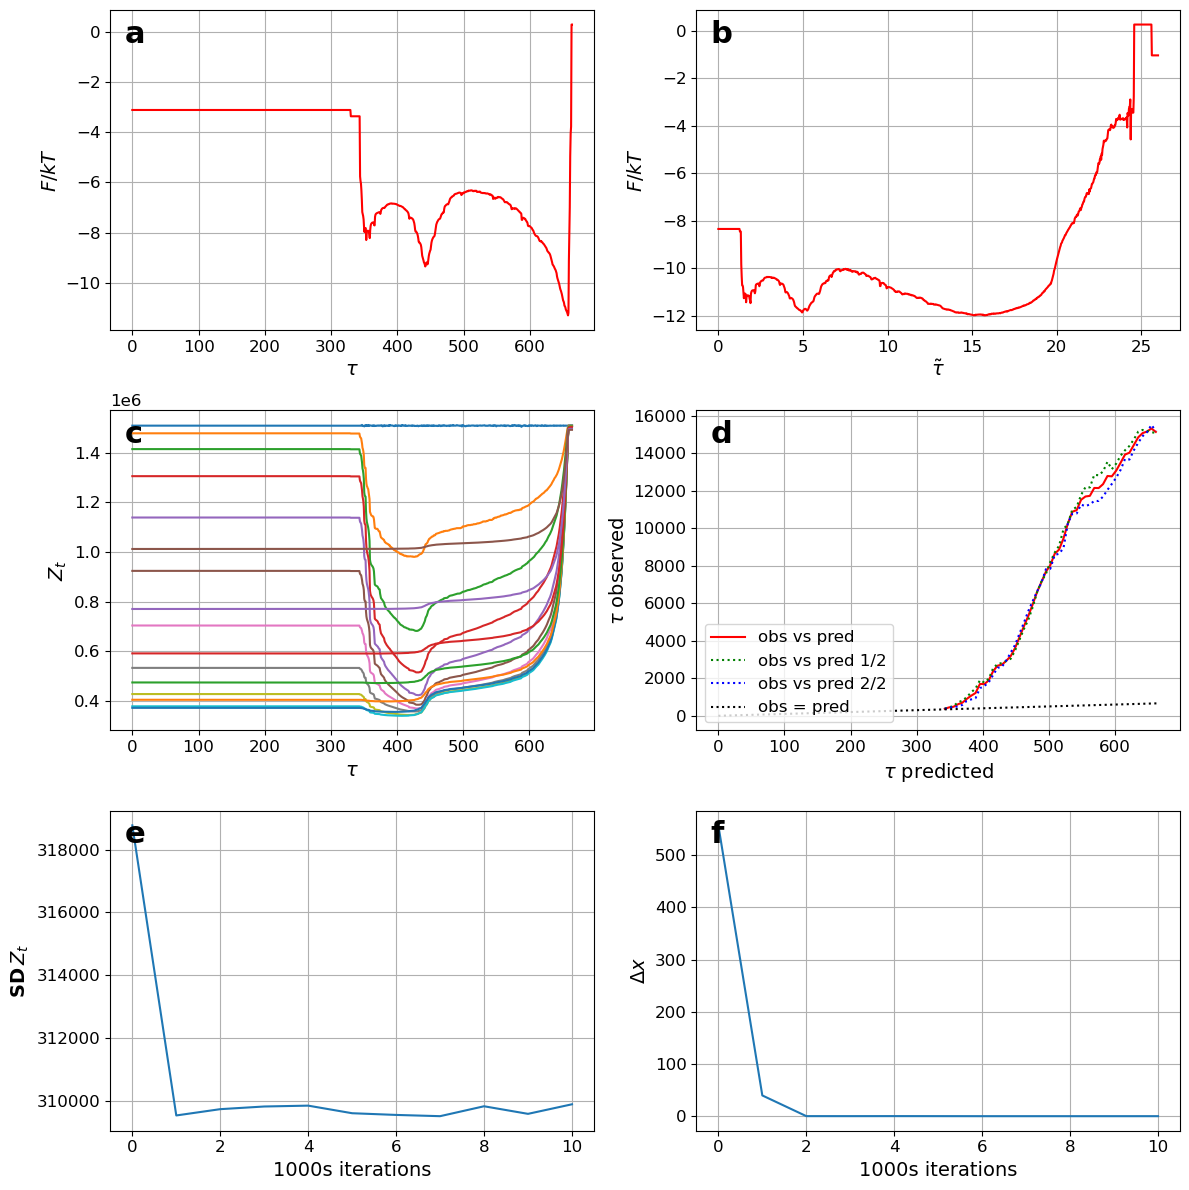

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
letters = ['a', 'b', 'c', 'd', 'e', 'f']
for i, ax in enumerate(axes.flat):
    ax.text(0.03, 0.97, letters[i], transform=ax.transAxes, fontsize=22, fontweight='bold', va='top')

r_traj=mfpt0.r_traj.numpy()
plots.plot_fep(axes[0,0], r_traj, xlabel='$\\tau$')
plots.plot_fep(axes[0,1], r_traj, natural=True, xlabel='$\\tilde{\\tau}$')
plots.plot_zt(axes[1,0], r_traj, mfpt0.b_traj, mfpt0.t_traj, mfpt0.i_traj, mfpt0.future_boundary, mfpt0.past_boundary)
plots.plot_obs_pred_t(axes[1,1], r_traj, mfpt0.future_boundary)
axes[1,1].legend(loc='lower left')

axes[2,0].plot(mfpt0.metrics_history['max_sd_zt'])
axes[2,0].set(ylabel='$\mathbf{SD}\\, Z_t$', xlabel='1000s iterations')
axes[2,0].grid()

axes[2,1].plot(mfpt0.metrics_history['delta_x'])
axes[2,1].set(ylabel='$ \\Delta x $', xlabel='1000s iterations')
axes[2,1].grid()

fig.tight_layout()
plt.savefig("FigS3.pdf",format='pdf')

[0, 1, 2, 4, 8, 16, 32, 64, 128, 256]
-23589.526573613748
#=0, it=-42.3323, sdzt=183685, dzt=175715, |dx|=9.73813, time=3.26786
#=1000, it=-5952.39, sdzt=137376, dzt=9910.25, |dx|=1738, time=29.7686
#=2000, it=-11445.6, sdzt=130792, dzt=6537.51, |dx|=1867.71, time=56.1217
#=3000, it=-16441, sdzt=122656, dzt=5087.19, |dx|=1948.23, time=82.7117
#=4000, it=-21015.6, sdzt=79533, dzt=2821.77, |dx|=2267.55, time=109.274
#=5000, it=-22842, sdzt=87490.3, dzt=2700, |dx|=1463.33, time=135.916
#=6000, it=-24069.7, sdzt=71042.5, dzt=2112.01, |dx|=1193.85, time=162.315
#=7000, it=-24671.6, sdzt=53464.9, dzt=1636.16, |dx|=897.78, time=188.693
#=8000, it=-24934.3, sdzt=37153.5, dzt=1132.57, |dx|=651.001, time=214.875
#=9000, it=-25190.3, sdzt=32841.3, dzt=1020.34, |dx|=472.05, time=241.292
#=10000, it=-25134.7, sdzt=27746.5, dzt=896.639, |dx|=333.492, time=267.576
#=11000, it=-25007, sdzt=25275.7, dzt=842.901, |dx|=243.522, time=293.857
#=12000, it=-24994.2, sdzt=23403.2, dzt=788.229, |dx|=137.471, t

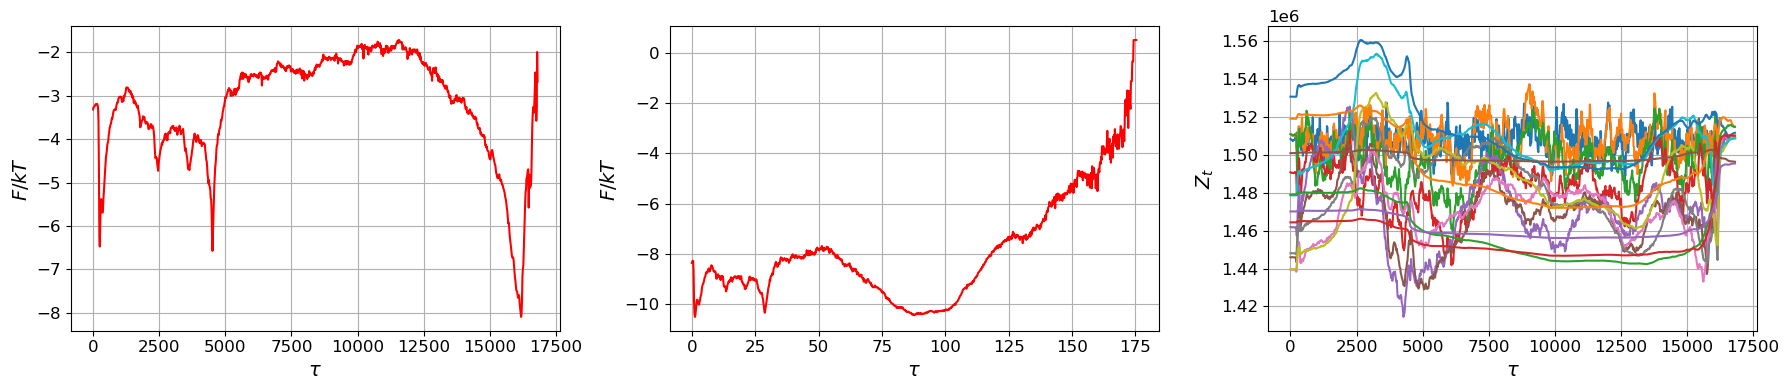

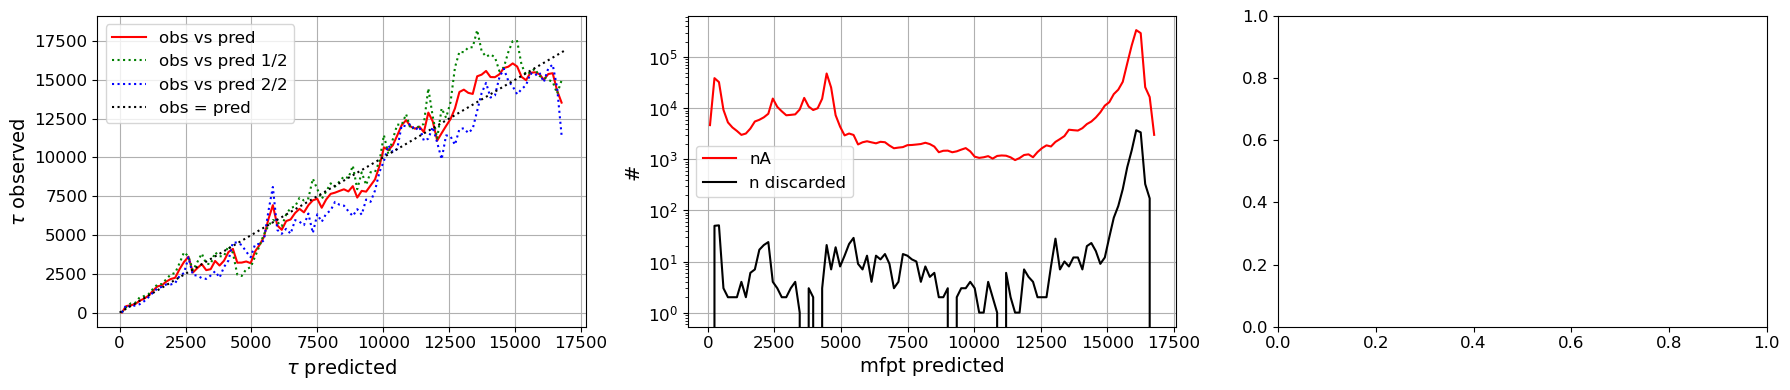

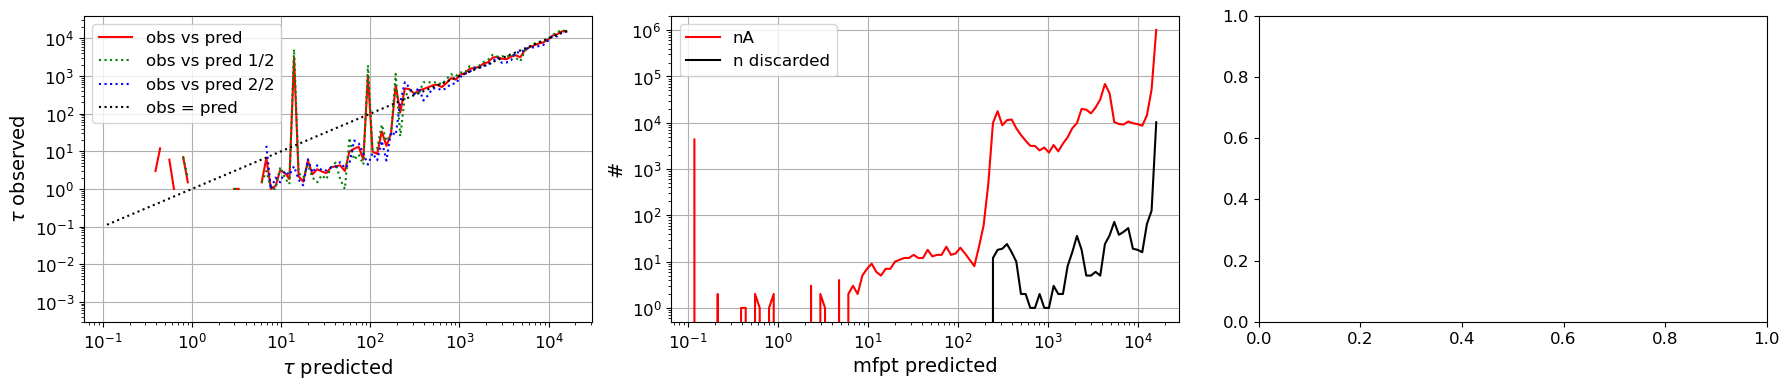

In [19]:
optimalrcs.envelope_scale=0.001

def comp_y(): return rmsd
nn=9
history_delta_t = [0,] + [2**i for i in range(nn)]
print (history_delta_t)
mfpt = optimalrcs.MFPTNE(boundary0=rmsd < 1)
print(metrics.low_bound_i_mfpt_eq(mfpt))
np.random.seed(0)
mfpt.fit_transform(comp_y=comp_y, gamma=0.1, max_iter=100000, history_delta_t=history_delta_t)
mfpt.plots_feps()
mfpt.plots_obs_pred()
mfpt.plots_obs_pred(log_scale=True)

[0, 1, 2, 4, 8, 16, 32, 64, 128, 256]
-23589.526573613748
#=0, it=-42.0999, sdzt=197274, dzt=201292, |dx|=9.6965, time=2.697
#=1000, it=-6019.67, sdzt=181234, dzt=12446, |dx|=1819.72, time=41.0577
#=2000, it=-14951.7, sdzt=103891, dzt=3439.21, |dx|=2851.74, time=79.3322
#=3000, it=-21668.6, sdzt=64461.6, dzt=2226.09, |dx|=2608.78, time=117.665
#=4000, it=-25278.9, sdzt=105744, dzt=3195.09, |dx|=2187.68, time=156.035
#=5000, it=-27374.8, sdzt=133105, dzt=2982.08, |dx|=1725.83, time=194.554
#=6000, it=-26943.4, sdzt=88968.5, dzt=2140.08, |dx|=1057.95, time=232.953
#=7000, it=-28148.1, sdzt=71901.2, dzt=1864.3, |dx|=870.152, time=271.226
#=8000, it=-28485.3, sdzt=55970.8, dzt=1368.34, |dx|=705.249, time=309.523
#=9000, it=-27725.8, sdzt=48073.7, dzt=1575.07, |dx|=386.751, time=347.665
#=10000, it=-27604.3, sdzt=44421.2, dzt=1500.15, |dx|=300.389, time=386.09
#=11000, it=-27589.1, sdzt=38438.8, dzt=1335.07, |dx|=221.852, time=424.422
#=12000, it=-27283, sdzt=28275.8, dzt=974.309, |dx|=159.

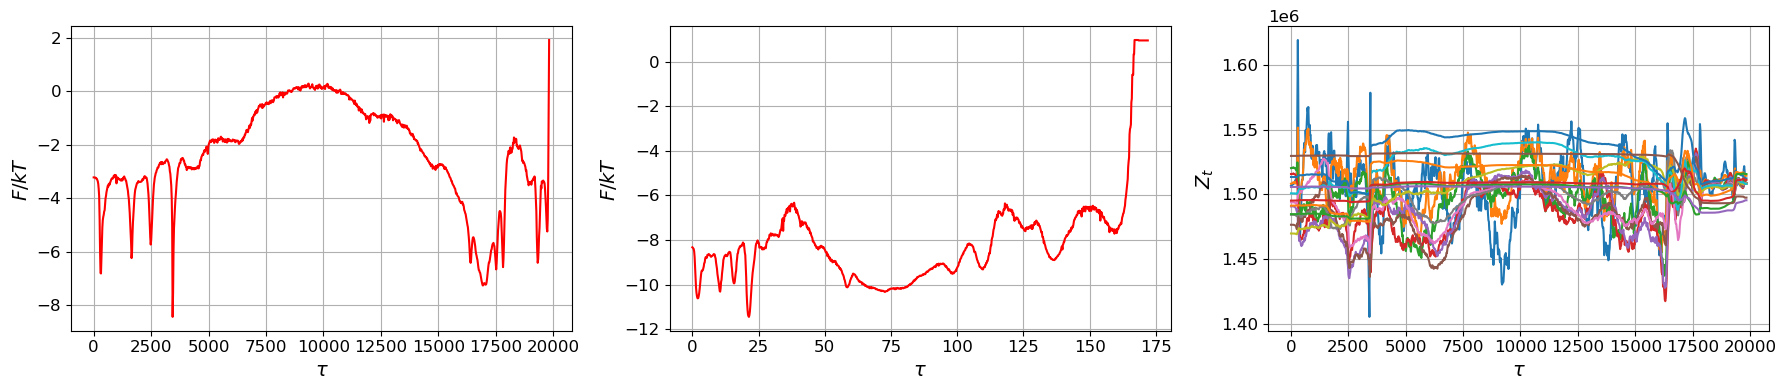

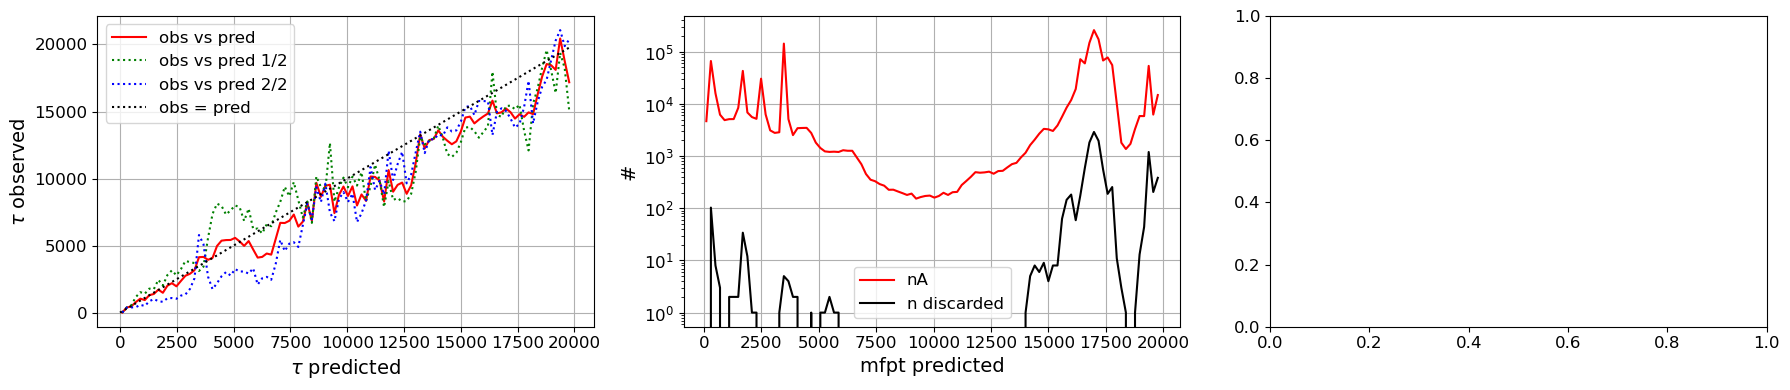

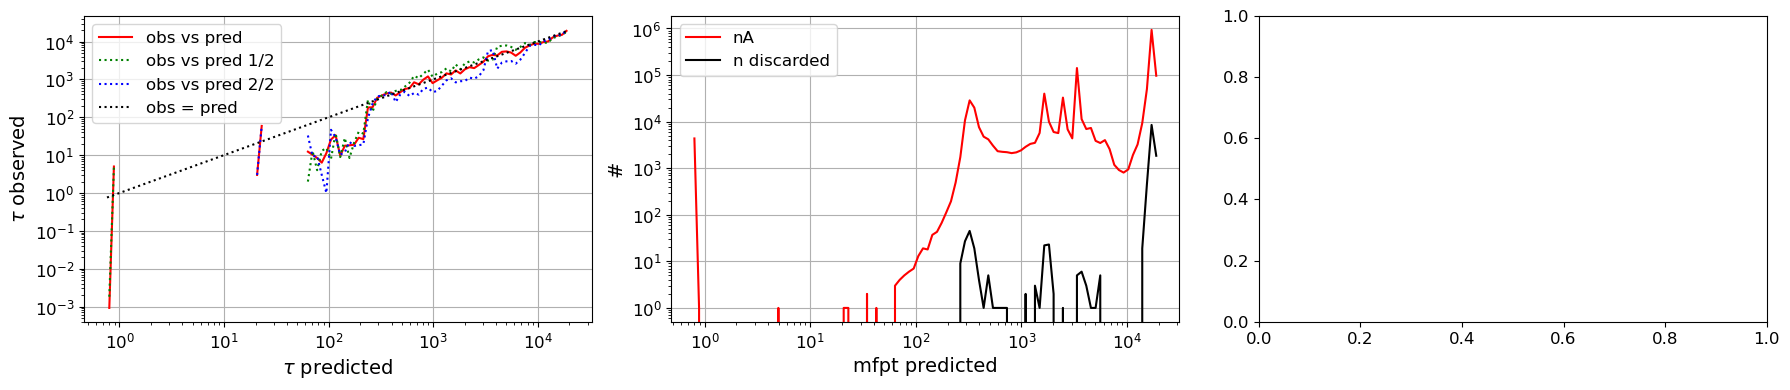

In [20]:
optimalrcs.envelope_scale=0.001

i_traj=np.ones_like(rmsd)
t_traj=np.asarray(range(len(rmsd)))

def comp_y():
    while True:
        j1,j2,j3=np.random.choice(range(csdih.shape[1]),3,replace=True)
        if abs(j1//4-j2//4)<=1 and abs(j2//4-j3//4)<=1:break
    a1,a2,a3=np.random.choice([-1,1],3,replace=True)
    return a1*csdih[:,j1]+a2*csdih[:,j2]+a3*csdih[:,j3]

nn=9
history_delta_t = [0,] + [2**i for i in range(nn)]
yr_type=['y(t-d),r(t-d)']
print (history_delta_t)
mfpt2 = optimalrcs.MFPTNE(boundary0=rmsd < 1, i_traj=i_traj, t_traj=t_traj)
print(metrics.low_bound_i_mfpt_eq(mfpt2))
np.random.seed(2)
mfpt2.fit_transform(comp_y=comp_y, gamma=0.1, max_iter=100000, history_delta_t=history_delta_t, history_type=yr_type, history_shift_type='r(t)')
mfpt2.plots_feps()
mfpt2.plots_obs_pred()
mfpt2.plots_obs_pred(log_scale=True)

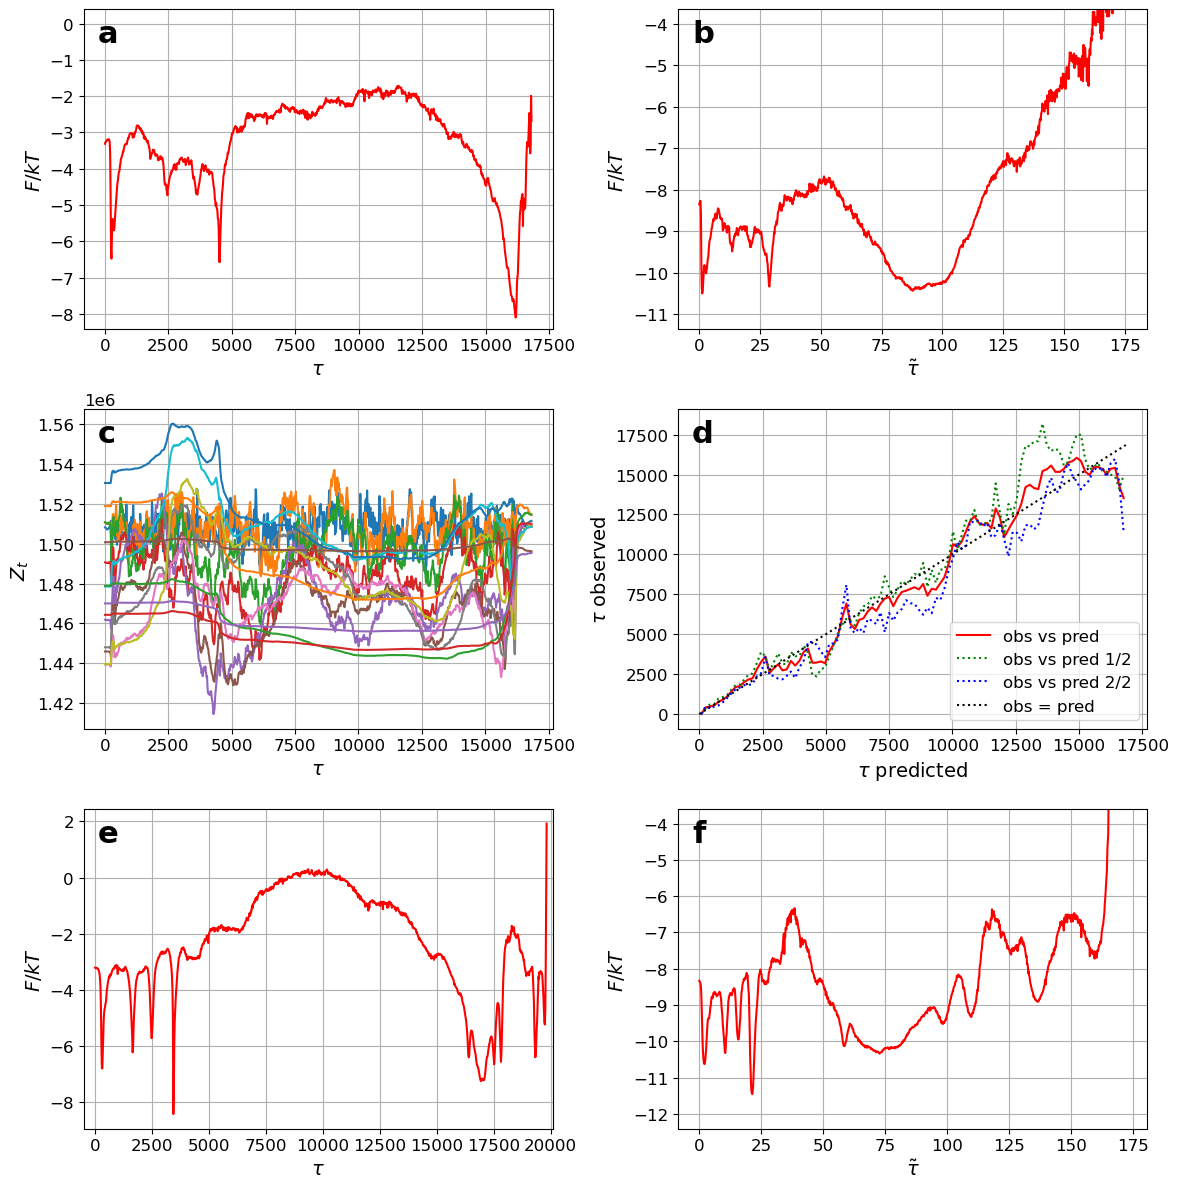

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
letters = ['a', 'b', 'c', 'd', 'e', 'f']
for i, ax in enumerate(axes.flat):
    ax.text(0.03, 0.97, letters[i], transform=ax.transAxes, fontsize=22, fontweight='bold', va='top')

r_traj=mfpt.r_traj.numpy()
plots.plot_fep(axes[0,0], r_traj, xlabel='$\\tau$')
plots.plot_fep(axes[0,1], r_traj, natural=True, xlabel='$\\tilde{\\tau}$')
axes[0,0].set_ylim(-8-0.4,0+0.4)
axes[0,1].set_ylim(-11-0.35,-4+0.35)
plots.plot_zt(axes[1,0], r_traj, mfpt.b_traj, mfpt.t_traj, mfpt.i_traj, mfpt.future_boundary, mfpt.past_boundary)
plots.plot_obs_pred_t(axes[1,1], r_traj, mfpt.future_boundary)
axes[1,1].legend(loc='lower right')

r_traj=mfpt2.r_traj.numpy()
plots.plot_fep(axes[2,0], r_traj, xlabel='$\\tau$')
axes[2,0].set_xlim(-500,20100)
plots.plot_fep(axes[2,1], r_traj, natural=True, xlabel='$\\tilde{\\tau}$')
axes[2,1].set_ylim(-12-0.4,-4+0.4)
fig.tight_layout()
plt.savefig("Fig4.pdf",format='pdf')